In [190]:
import pandas as pd
import random
import os
import numpy as np
import matplotlib.pyplot as plt
import warnings; warnings.filterwarnings(action='ignore')
import pickle

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
import sklearn.svm as svm
import xgboost as xgb

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from bayes_opt import BayesianOptimization
from matplotlib_venn import venn2, venn2_circles

from xgboost import plot_importance
from scipy.stats import randint
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [191]:
def seed_everything(seed):
    random.seed(seed) #파이썬 자체 모듈 random 모듈의 시드 고정
    os.environ['PYTHONHASHSEED'] = str(seed) 
    np.random.seed(seed)

seed_everything(37) # Seed 고정

# Data Load

In [192]:
train_df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')

In [193]:
sub = pd.read_csv('./sample_submission.csv')
sub2 = pd.read_csv('./sample_submission.csv')
sub3 = pd.read_csv('./sample_submission.csv')
sub4 = pd.read_csv('./sample_submission.csv')
sub5 = pd.read_csv('./sample_submission.csv')

In [40]:
train_a.iloc[:40,:330]

PRODUCT_ID  Y_Class  Y_Quality         TIMESTAMP     LINE PRODUCT_CODE  \
0   TRAIN_000        1   0.533433   2022-06-13 5:14  T050304         A_31   
1   TRAIN_001        2   0.541819   2022-06-13 5:22  T050307         A_31   
2   TRAIN_002        1   0.531267   2022-06-13 5:30  T050304         A_31   
3   TRAIN_003        2   0.537325   2022-06-13 5:39  T050307         A_31   
4   TRAIN_004        1   0.531590   2022-06-13 5:47  T050304         A_31   
5   TRAIN_005        2   0.537833   2022-06-13 5:55  T050307         A_31   
6   TRAIN_006        1   0.533665   2022-06-13 6:03  T050304         A_31   
7   TRAIN_007        2   0.540003   2022-06-13 6:11  T050307         A_31   
8   TRAIN_008        1   0.531821   2022-06-13 6:19  T050304         A_31   
9   TRAIN_009        2   0.538049   2022-06-13 6:28  T050307         A_31   
10  TRAIN_010        1   0.531503   2022-06-13 6:36  T050304         A_31   
11  TRAIN_011        2   0.539149   2022-06-13 6:44  T050307         A_31   
12  TRAIN_012        1   0.533632   2022-06-13 6:52  T050304         A_31   
13  TRAIN_013        2   0.538508   2022-06-13 7:00  T050307         A_31   
14  TRAIN_014        1   0.531254   2022-06-13 7:08  T050304         A_31   
15  TRAIN_015        2   0.539254   2022-06-13 7:17  T050307         A_31   
16  TRAIN_016        1   0.534054   2022-06-13 7:25  T050304         A_31   
17  TRAIN_017        2   0.538854   2022-06-13 7:33  T050307         A_31   
18  TRAIN_018        1   0.532170   2022-06-13 7:41  T050304         A_31   
19  TRAIN_019        2   0.539235   2022-06-13 7:49  T050307         A_31   
20  TRAIN_020        1   0.531179   2022-06-13 7:58  T050304         A_31   
21  TRAIN_021        2   0.544129   2022-06-14 5:58  T050304         A_31   
24  TRAIN_024        2   0.578841  2022-06-16 23:46  T050307         A_31   
27  TRAIN_027        2   0.540002  2022-06-19 20:18  T010306         A_31   
28  TRAIN_028        0   0.521249  2022-06-19 20:26  T010305         A_31   
31  TRAIN_031        2   0.536206  2022-06-20 21:55  T010306         A_31   
32  TRAIN_032        2   0.548592   2022-06-21 7:06  T010306         A_31   
33  TRAIN_033        1   0.526656   2022-06-21 7:14  T010305         A_31   
34  TRAIN_034        0   0.521524  2022-06-21 17:36  T050304         A_31   
35  TRAIN_035        1   0.527976  2022-06-21 17:44  T050307         A_31   
38  TRAIN_038        2   0.536616   2022-06-22 4:37  T010306         A_31   
39  TRAIN_039        1   0.531583   2022-06-22 4:45  T010305         A_31   
40  TRAIN_040        1   0.530829  2022-06-22 12:26  T010305         A_31   
41  TRAIN_041        1   0.528270  2022-06-22 12:34  T010305         A_31   
47  TRAIN_047        1   0.533230  2022-06-23 15:42  T010306         A_31   
48  TRAIN_048        1   0.533273  2022-06-23 15:50  T010305         A_31   
51  TRAIN_051        2   0.547184   2022-06-24 4:05  T010306         A_31   
52  TRAIN_052        2   0.555514   2022-06-24 4:13  T010305         A_31   
53  TRAIN_053        2   0.554498   2022-06-24 6:20  T010306         A_31   
54  TRAIN_054        2   0.545925   2022-06-24 6:28  T010306         A_31   

    X_1  X_2  X_3  X_4  ...  X_315  X_316  X_317  X_318  X_319  X_320  X_321  \
0   NaN  NaN  NaN  NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1   NaN  NaN  NaN  NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2   NaN  NaN  NaN  NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
3   NaN  NaN  NaN  NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
4   NaN  NaN  NaN  NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
5   NaN  NaN  NaN  NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
6   NaN  NaN  NaN  NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
7   NaN  NaN  NaN  NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
8   NaN  NaN  NaN  NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
9   NaN  NaN  NaN  NaN  ...    NaN    NaN    

In [55]:
print(len(train_a))
print(len(train_to))
print(len(test_a))
print(len(test_to))

249
349
67
243


In [194]:
rem_col_a = train_a.isnull().sum()[train_a.isnull().sum() == 249].index.tolist() #나중에 지워야함
rem_col_to = train_to.isnull().sum()[train_to.isnull().sum() == 349].index.tolist()

In [195]:
rem_col_a_ts = test_a.isnull().sum()[test_a.isnull().sum() == 67].index.tolist()
rem_col_to_ts = test_to.isnull().sum()[test_to.isnull().sum() == 243].index.tolist()

In [196]:
def draw_venn(sets):
    venn2(subsets=sets, set_labels=('A_train', 'A_test'))
    plt.show()

In [197]:
def draw_venn2(sets):
    venn2(subsets=sets, set_labels=('TO_train', 'TO_test'))
    plt.show()

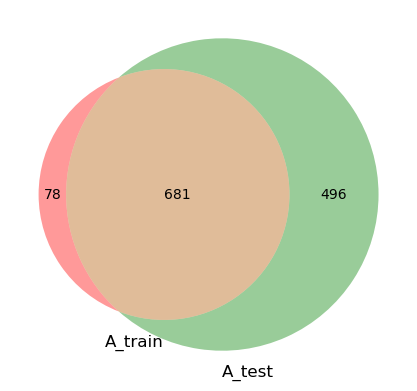

In [198]:
s1 = set(rem_col_a)
s2 = set(rem_col_a_ts)
draw_venn([s1, s2])

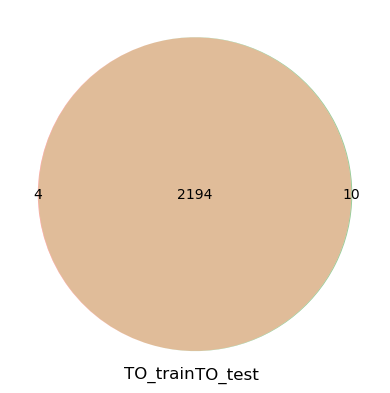

In [199]:
s3 = set(rem_col_to) #to 라인
s4 = set(rem_col_to_ts)
draw_venn2([s3, s4])

In [200]:
intersec_a = s1.intersection(s2)

In [201]:
intersec_to = s3.intersection(s4)

# Data Preprocessing

X

In [111]:
if [i for i in a_list] in rem_col_a: #a의 null column에 순위권에 든 column이 있는지 확인
    print('있다')

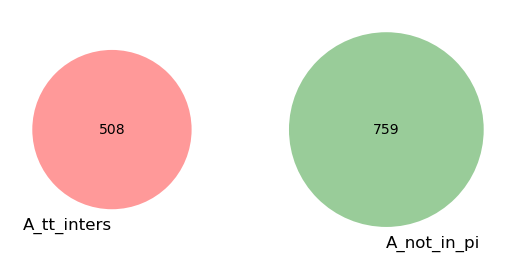

In [202]:
s10 = set(a_list)
draw_venn3([s10, s1])

In [203]:
train_a = train_df[train_df['PRODUCT_CODE']=='A_31']
train_to = train_df[(train_df['PRODUCT_CODE']=='T_31') | (train_df['PRODUCT_CODE']=='O_31')]

In [204]:
test_a = test_df[test_df['PRODUCT_CODE']=='A_31']
test_to = test_df[(test_df['PRODUCT_CODE']=='T_31') | (test_df['PRODUCT_CODE']=='O_31')]

In [205]:
#a 상위 200 column X_938까지할지 생각중
a_top200_list = ['X_318', 'X_248', 'X_256', 'X_2728', 'X_1048', 'X_1033', 'X_1109', 'X_1743', 'X_1055', 'X_1010', 'X_189', 'X_1774', 'X_1176', 'X_1158', 'X_1120', 'X_2190', 'X_1373', 'X_1026', 'X_2427', 'X_2423', 'X_1569', 'X_1991', 'X_1562', 'X_1037', 'X_1679', 'X_1563', 'X_1953', 'X_1720', 'X_996', 'X_2541', 'X_1329', 'X_1082', 'X_2797', 'X_1548', 'X_1665', 'X_1124', 'X_959', 'X_1422', 'X_1058', 'X_1806', 'X_1716', 'X_1408', 'X_1286', 'X_1812', 'X_1243', 'X_1231', 'X_1214', 'X_1054', 'X_993', 'X_1089', 'X_130', 'X_1211', 'X_1099', 'X_1076', 'X_2097', 'X_1945', 'X_1854', 'X_1786', 'X_1521', 'X_1356', 'X_1337', 'X_1123', 'X_1110', 'X_1053', 'X_2084', 'X_1291', 'X_141', 'X_1864', 'X_1275', 'X_1179', 'X_1948', 'X_1420', 'X_1264', 'X_1560', 'X_1543', 'X_1343', 'X_1114', 'X_1108', 'X_1083', 'X_947', 'X_2017', 'X_1856', 'X_1279', 'X_1207', 'X_967', 'X_257', 'X_251', 'X_2791', 'X_1382', 'X_1371', 'X_1190', 'X_1154', 'X_1030', 'X_973', 'X_953', 'X_2021', 'X_1954', 'X_1860', 'X_1625', 'X_1212', 'X_1194', 'X_1014', 'X_961', 'X_943', 'X_1949', 'X_1816', 'X_1668', 'X_1220', 'X_999', 'X_982', 'X_258', 'X_1794', 'X_1651', 'X_1616', 'X_1389', 'X_1344', 'X_1239', 'X_1107', 'X_1013', 'X_948', 'X_307', 'X_2700', 'X_1750', 'X_1530', 'X_1424', 'X_1423', 'X_1374', 'X_1366', 'X_1347', 'X_1160', 'X_1129', 'X_984', 'X_945', 'X_938', 'X_1406', 'X_1339', 'X_1294', 'X_1188', 'X_1029','X_979', 'X_348', 'X_290', 'X_2704', 'X_1631', 'X_1568', 'X_1534', 'X_1532', 'X_1518', 'X_1411', 'X_1369', 'X_1355', 'X_1285', 'X_1262', 'X_1205', 'X_1098', 'X_1052', 'X_972', 'X_942', 'X_345', 'X_217', 'X_2446', 'X_1919', 'X_1866', 'X_1526', 'X_1359', 'X_1357', 'X_1288', 'X_1283', 'X_1265', 'X_1202', 'X_1184', 'X_1155', 'X_1121', 'X_1101', 'X_1094', 'X_1077', 'X_1063', 'X_956', 'X_955', 'X_364', 'X_339', 'X_2418', 'X_2018', 'X_1973', 'X_1952', 'X_1635', 'X_1587', 'X_1584', 'X_1428', 'X_1425', 'X_1379', 'X_1338', 'X_1221', 'X_1197', 'X_1125', 'X_1122', 'X_128', 'X_2710', 'X_2068', 'X_2051', 'X_1966']
len(a_top200_list)

201

In [96]:
#a 상위 201~0.1column전까지
a_201_not04 = ['X_1956', 'X_1776', 'X_1735', 'X_1697', 'X_1657', 'X_1622', 'X_1613', 'X_1612', 'X_1430', 'X_1429', 'X_1280', 'X_1178', 'X_1177', 'X_1046', 'X_1043', 'X_1018', 'X_1002', 'X_975', 'X_958', 'X_957', 'X_287', 'X_285', 'X_240', 'X_']
len(a_201_not04)

23

In [121]:
#0.5점수의 column까지 224개
a_top224_list = a_top200_list + a_201_not04

In [97]:
a_04_col = ['X_2409', 'X_2093', 'X_2080', 'X_2041', 'X_2022', 'X_1977', 'X_1968', 'X_1965', 'X_1788', 'X_1770', 'X_1758', 'X_1748', 'X_1706', 'X_1649', 'X_1642', 'X_1641', 'X_1633', 'X_1556', 'X_1417', 'X_1375', 'X_1342', 'X_1300', 'X_1228', 'X_1135', 'X_1128', 'X_1127', 'X_1112', 'X_1060', 'X_1045', 'X_1015', 'X_965', 'X_962', 'X_949', 'X_941', 'X_263', 'X_139']
len(a_04_col)

36

In [98]:
a_03_col = ['X_136', 'X_2841', 'X_2762', 'X_2717', 'X_2701', 'X_2452', 'X_2434', 'X_2026', 'X_2025', 'X_1978', 'X_1972', 'X_1967', 'X_1958', 'X_1957', 'X_1834', 'X_1736', 'X_1714', 'X_1712', 'X_1639', 'X_1547', 'X_1390', 'X_1385', 'X_1352', 'X_1340', 'X_1297', 'X_1292', 'X_1277', 'X_1225', 'X_1203', 'X_1193', 'X_1192', 'X_1191', 'X_1180', 'X_1170', 'X_1169', 'X_1136', 'X_1100', 'X_1081', 'X_1059', 'X_1044', 'X_1038', 'X_1017', 'X_991', 'X_983', 'X_976', 'X_944', 'X_356', 'X_354']
len(a_03_col)

48

In [99]:
a_02_col = ['X_2800', 'X_2780', 'X_2455', 'X_2191', 'X_2099', 'X_1981', 'X_1979', 'X_1814', 'X_1746', 'X_1744', 'X_1726', 'X_1703', 'X_1611', 'X_1609', 'X_1586', 'X_1565', 'X_1564', 'X_1427', 'X_1419', 'X_1409', 'X_1381', 'X_1358', 'X_1349', 'X_1348', 'X_1289', 'X_1276', 'X_1270', 'X_1267', 'X_1263', 'X_1261', 'X_1260', 'X_1227', 'X_1213', 'X_1210', 'X_1181', 'X_1167', 'X_1162', 'X_1161', 'X_1106', 'X_1097', 'X_1078', 'X_1064', 'X_1036', 'X_1035', 'X_1034', 'X_985', 'X_966', 'X_954', 'X_379', 'X_373', 'X_372', 'X_365', 'X_299', 'X_289', 'X_288', 'X_283', 'X_269', 'X_261', 'X_211', 'X_146']
len(a_02_col)

60

In [100]:
#a 제거할 0.1 column들만
a_01_col = ['X_2839', 'X_2794', 'X_2771', 'X_2753', 'X_2750', 'X_2739', 'X_2716', 'X_2715', 'X_2712', 'X_2711', 'X_2440', 'X_2437', 'X_2415', 'X_2098', 'X_2096', 'X_2082', 'X_2079', 'X_2063', 'X_2044', 'X_2027', 'X_2024', 'X_1992', 'X_1990', 'X_1989', 'X_1986', 'X_1980', 'X_1974', 'X_1970', 'X_1969', 'X_1963', 'X_1961', 'X_1947', 'X_1862', 'X_1855', 'X_1850', 'X_1849', 'X_1832', 'X_1821', 'X_1818', 'X_1817', 'X_1810', 'X_1809', 'X_1804', 'X_1798', 'X_1793', 'X_1792', 'X_1782', 'X_1781', 'X_1773', 'X_1747', 'X_1708', 'X_1704', 'X_1694', 'X_1686', 'X_1666', 'X_1647', 'X_1634', 'X_1629', 'X_1623', 'X_1620', 'X_1614', 'X_1606', 'X_1592', 'X_1591', 'X_1566', 'X_1561', 'X_1558', 'X_1557', 'X_1551', 'X_1549', 'X_1535', 'X_1413', 'X_1410', 'X_1398', 'X_1391', 'X_1386', 'X_1370', 'X_1354', 'X_1351', 'X_1346', 'X_1345', 'X_1336', 'X_1296', 'X_1247', 'X_1238', 'X_1236', 'X_1218', 'X_1217', 'X_1215', 'X_1209', 'X_1208', 'X_1199', 'X_1187', 'X_1185', 'X_1183', 'X_1182', 'X_1174', 'X_1168', 'X_1156', 'X_1153', 'X_1152', 'X_1150', 'X_1149', 'X_1147', 'X_1144', 'X_1140', 'X_1134', 'X_1118', 'X_1113', 'X_1096', 'X_1091', 'X_1084', 'X_1071', 'X_1069', 'X_1065', 'X_1061', 'X_1051', 'X_1028', 'X_981', 'X_977', 'X_968', 'X_964', 'X_963', 'X_939', 'X_358', 'X_352', 'X_350', 'X_344', 'X_338', 'X_337', 'X_301', 'X_300', 'X_271', 'X_262', 'X_247', 'X_183', 'X_167', 'X_163', 'X_160', 'X_159', 'X_140']
len(a_01_col)

141

In [101]:
a_list = a_top200_list + a_201_not04 + a_04_col + a_03_col + a_02_col + a_01_col
len(a_list)

508

In [94]:
total_col = set(train_a.columns[-2875:])
#표에 없는 column 2368개
not_in_a_list = total_col - set(a_list)
len(not_in_a_list)

2368

In [ ]:
#표에 없거나 1.0인 column들
a_bottom_list = 

In [109]:
def draw_venn3(sets):
    venn2(subsets=sets, set_labels=('A_tt_inters', 'A_not_in_pi'))
    plt.show()

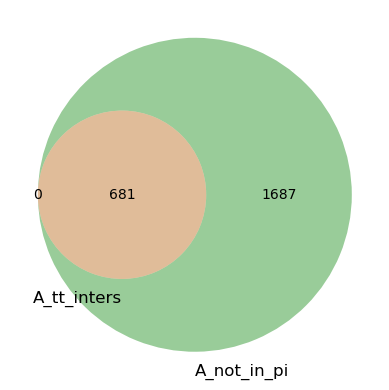

In [108]:
draw_venn3([intersec_a, not_in_a_list])

In [374]:
#a 상위 200 column 0.5까지만(0.5 조건 x)
to_top182_list = ['X_932', 'X_458', 'X_73', 'X_516', 'X_718', 'X_838', 'X_401', 'X_124', 'X_783', 'X_698', 'X_493', 'X_497', 'X_422', 'X_536', 'X_556', 'X_790', 'X_419', 'X_712', 'X_490', 'X_399', 'X_442', 'X_397', 'X_613', 'X_835', 'X_700', 'X_678', 'X_709', 'X_611', 'X_546', 'X_769', 'X_659', 'X_606', 'X_436', 'X_554', 'X_484', 'X_483', 'X_126', 'X_12', 'X_498', 'X_102', 'X_780', 'X_786', 'X_687', 'X_614', 'X_485', 'X_421', 'X_489', 'X_400', 'X_774', 'X_491', 'X_663', 'X_446', 'X_398', 'X_394', 'X_841', 'X_500', 'X_462', 'X_661', 'X_90', 'X_590', 'X_385', 'X_792', 'X_714', 'X_665', 'X_608', 'X_572', 'X_456', 'X_896', 'X_816', 'X_517', 'X_897', 'X_772', 'X_530', 'X_515', 'X_482', 'X_514', 'X_496', 'X_2', 'X_895', 'X_757', 'X_560', 'X_543', 'X_501', 'X_907', 'X_894', 'X_605', 'X_581', 'X_566', 'X_473', 'X_448', 'X_105', 'X_855', 'X_716', 'X_107', 'X_850', 'X_662', 'X_595', 'X_574', 'X_573', 'X_555', 'X_460', 'X_439', 'X_438', 'X_616', 'X_599', 'X_563', 'X_452', 'X_407', 'X_589', 'X_523', 'X_461', 'X_690', 'X_539', 'X_831', 'X_789', 'X_588', 'X_454', 'X_404', 'X_388', 'X_120', 'X_848', 'X_711', 'X_671', 'X_619', 'X_596', 'X_513', 'X_451', 'X_389', 'X_127', 'X_118', 'X_815', 'X_812', 'X_766', 'X_471', 'X_464', 'X_437', 'X_101', 'X_845', 'X_763', 'X_688', 'X_677', 'X_447', 'X_413', 'X_402', 'X_883', 'X_851', 'X_791', 'X_669', 'X_562', 'X_494', 'X_468', 'X_457', 'X_412', 'X_109', 'X_16', 'X_796', 'X_794', 'X_681', 'X_668', 'X_477', 'X_98', 'X_46', 'X_18', 'X_580', 'X_570', 'X_553', 'X_499', 'X_453', 'X_440', 'X_387', 'X_45', 'X_813', 'X_775', 'X_615', 'X_607', 'X_576', 'X_537', 'X_524', 'X_476', 'X_475', 'X_403', 'X_17']
len(to_top182_list)

182

In [ ]:
, 'X_909', 'X_846', 'X_817', 'X_795', 'X_710', 'X_703', 'X_686', 'X_667', 'X_651', 'X_610', 'X_520', 'X_405', 'X_11', 'X_5', 'X_853', 'X_833', 'X_827', 'X_755']

In [8]:
print(len(train_a)) #196 245
print(len(train_to))

249
349


In [9]:
print(len(test_a)) #196 245
print(len(test_to))

67
243


In [186]:
train_to.isnull().sum().iloc[1560:1600]

X_1555    349
X_1556    349
X_1557    349
X_1558    349
X_1559    349
X_1560    349
X_1561    349
X_1562    349
X_1563    349
X_1564    349
X_1565    349
X_1566    349
X_1567    349
X_1568    349
X_1569    349
X_1570    349
X_1571    349
X_1572    349
X_1573    349
X_1574    349
X_1575    349
X_1576    349
X_1577    349
X_1578    349
X_1579    349
X_1580    349
X_1581    349
X_1582    349
X_1583    349
X_1584    349
X_1585    349
X_1586    349
X_1587    349
X_1588    349
X_1589    349
X_1590    349
X_1591    349
X_1592    349
X_1593    349
X_1594    349
dtype: int64

In [141]:
train_to.groupby('LINE')['X_92'].mean() #304라인만 측정된다면 306 결측치 174개

LINE
T100304    28.0
T100306     NaN
Name: X_92, dtype: float64

In [142]:
train_to.groupby('LINE')['X_93'].mean()#306라인만 측정된다면 304 결측치 175개

LINE
T100304     NaN
T100306    0.19
Name: X_93, dtype: float64

In [158]:
train_to.groupby('LINE')['X_529'].mean()

LINE
T100304    258.380601
T100306    257.152434
Name: X_529, dtype: float64

<train_to 분석>
X_384~399, 406~441  472~528 등등등 결측치 1개 이런걸 채워주려한다.

X529~533 처럼 두 라인에서 원래 다 측정되야 하지만, 측정되지 않은 것들을 yclass와 라인별로 median값을 넣어줄 것. 339나 262개의 결측치

In [227]:
def fill_nan(df): #미디언으로 해주는 이유는 yclass가 0인건 55 1인건 59 이런 식으로 규칙이 존재하기 때문에 함부로 평균을 내면 안될 것 같음
#     val_lst = {}
    for col in df.columns[-2875:]: #X_1 ~ X_1531 , -1345
        #모두 결측치 인 경우 채우지 않는다.
        #T304 라인만 측정된 경우, 냅두기
        #T306 라인만 측정된 경우, 냅두기

        if df[col].isnull().sum() == len(df): #모든 value가 결측치인 행
            continue
            
        elif len(df) - df[col].isnull().sum() <= 10: #너무 적은 개수만큼 측정되었다면, 그냥 채우지 않기 train_df_o의 경우 x
            continue
            
        elif df[col].isnull().sum() == 0: #모든 값이 다 측정된 경우 null 0개
            continue
            
        elif df[col].isnull().sum() < len(df): #T050이나 T010라인만 측정된 경우 어차피 값이 들어가지 않을 것임.
            nan_lst = list(df[df[col].isnull()==True].index)
            for j in nan_lst:
                yc = df['Y_Class'][j]
                line = df['LINE'][j]
                val = df[col][(df['Y_Class']==yc) & (df['LINE']==line)].median()
                df[col][j] = val
#                 val_lst[col] = val

    fill_df = df    
    return fill_df

train 데이터에만 결측치의 일부 채워준다.

In [207]:
train_fill_a = fill_nan(train_a)
train_fill_to = fill_nan(train_to)

X_128
X_129
X_130
X_131
X_132
X_133
X_134
X_135
X_136
X_137
X_138
X_139
X_140
X_141
X_142
X_143
X_144
X_145
X_146
X_147
X_148
X_149
X_150
X_151
X_152
X_153
X_154
X_155
X_156
X_157
X_158
X_159
X_160
X_161
X_162
X_163
X_164
X_165
X_166
X_167
X_168
X_169
X_170
X_171
X_172
X_173
X_174
X_175
X_176
X_177
X_178
X_179
X_180
X_181
X_182
X_183
X_184
X_185
X_186
X_187
X_188
X_189
X_190
X_191
X_192
X_193
X_194
X_195
X_196
X_197
X_198
X_199
X_200
X_201
X_202
X_203
X_204
X_205
X_206
X_207
X_208
X_209
X_210
X_211
X_212
X_213
X_214
X_215
X_216
X_217
X_218
X_219
X_220
X_221
X_222
X_223
X_224
X_225
X_226
X_227
X_228
X_229
X_230
X_231
X_232
X_233
X_234
X_235
X_236
X_237
X_238
X_239
X_240
X_241
X_242
X_243
X_244
X_245
X_246
X_247
X_248
X_249
X_250
X_251
X_252
X_253
X_254
X_255
X_256
X_257
X_258
X_259
X_260
X_261
X_262
X_263
X_264
X_265
X_266
X_267
X_268
X_269
X_270
X_271
X_272
X_273
X_274
X_275
X_276
X_277
X_278
X_279
X_280
X_281
X_282
X_283
X_285
X_286
X_287
X_288
X_289
X_290
X_291
X_292
X_293
X_294
X_29

X_2127
X_2128
X_2129
X_2130
X_2131
X_2132
X_2133
X_2134
X_2135
X_2136
X_2137
X_2138
X_2139
X_2140
X_2141
X_2142
X_2143
X_2144
X_2145
X_2146
X_2147
X_2148
X_2149
X_2150
X_2151
X_2152
X_2153
X_2154
X_2155
X_2156
X_2157
X_2158
X_2159
X_2160
X_2161
X_2162
X_2163
X_2164
X_2165
X_2166
X_2167
X_2168
X_2169
X_2170
X_2171
X_2172
X_2173
X_2174
X_2175
X_2176
X_2177
X_2178
X_2179
X_2180
X_2181
X_2182
X_2183
X_2184
X_2185
X_2186
X_2187
X_2188
X_2189
X_2190
X_2191
X_2192
X_2193
X_2194
X_2195
X_2196
X_2197
X_2198
X_2199
X_2200
X_2201
X_2202
X_2203
X_2204
X_2205
X_2206
X_2207
X_2208
X_2209
X_2210
X_2211
X_2212
X_2213
X_2214
X_2215
X_2216
X_2217
X_2218
X_2219
X_2220
X_2221
X_2222
X_2223
X_2224
X_2225
X_2226
X_2227
X_2228
X_2229
X_2230
X_2231
X_2232
X_2233
X_2234
X_2235
X_2236
X_2237
X_2238
X_2239
X_2240
X_2241
X_2242
X_2243
X_2244
X_2245
X_2246
X_2247
X_2248
X_2249
X_2250
X_2251
X_2252
X_2253
X_2254
X_2255
X_2256
X_2257
X_2258
X_2259
X_2260
X_2261
X_2262
X_2263
X_2264
X_2265
X_2266
X_2267
X_2268
X_2269

In [223]:
train_a.groupby('LINE')['X_339', 'X_340', 'X_341'].mean()

X_339  X_340     X_341
LINE                              
T010305  0.000007    NaN       NaN
T010306       NaN   0.22  0.229714
T050304       NaN    NaN       NaN
T050307       NaN    NaN       NaN

In [229]:
drop_col_a = set(train_a.columns[-2875:])-set(a_top224_list)
drop_col_a

{'X_757',
 'X_997',
 'X_1421',
 'X_2769',
 'X_1833',
 'X_887',
 'X_693',
 'X_2576',
 'X_517',
 'X_1753',
 'X_1443',
 'X_2278',
 'X_388',
 'X_1238',
 'X_2828',
 'X_1363',
 'X_1821',
 'X_765',
 'X_1062',
 'X_404',
 'X_1228',
 'X_1931',
 'X_860',
 'X_941',
 'X_1080',
 'X_2802',
 'X_2653',
 'X_2359',
 'X_622',
 'X_1633',
 'X_1354',
 'X_1541',
 'X_1681',
 'X_2475',
 'X_1509',
 'X_2432',
 'X_1358',
 'X_2109',
 'X_462',
 'X_1906',
 'X_322',
 'X_809',
 'X_1311',
 'X_1770',
 'X_92',
 'X_2800',
 'X_1857',
 'X_2643',
 'X_2507',
 'X_1200',
 'X_122',
 'X_1813',
 'X_2003',
 'X_233',
 'X_2198',
 'X_2187',
 'X_2471',
 'X_1591',
 'X_1503',
 'X_802',
 'X_2838',
 'X_2845',
 'X_2678',
 'X_628',
 'X_2377',
 'X_2365',
 'X_1641',
 'X_2176',
 'X_511',
 'X_2581',
 'X_1793',
 'X_2268',
 'X_1466',
 'X_611',
 'X_2689',
 'X_2180',
 'X_2708',
 'X_1706',
 'X_1710',
 'X_2444',
 'X_1536',
 'X_1504',
 'X_1035',
 'X_585',
 'X_2384',
 'X_2324',
 'X_2819',
 'X_86',
 'X_60',
 'X_619',
 'X_751',
 'X_1524',
 'X_2131',
 'X_87

In [375]:
drop_col_to = set(train_to.columns[-2875:])-set(to_top182_list)

In [376]:
train_drop_a = train_fill_a.drop(drop_col_a, axis = 1)
train_drop_to = train_fill_to.drop(drop_col_to, axis = 1)

In [377]:
test_drop_a = test_a.drop(drop_col_a, axis = 1)
test_drop_to = test_to.drop(drop_col_to, axis = 1)

In [233]:
train_drop_a

PRODUCT_ID  Y_Class  Y_Quality         TIMESTAMP     LINE PRODUCT_CODE  \
0    TRAIN_000        1   0.533433   2022-06-13 5:14  T050304         A_31   
1    TRAIN_001        2   0.541819   2022-06-13 5:22  T050307         A_31   
2    TRAIN_002        1   0.531267   2022-06-13 5:30  T050304         A_31   
3    TRAIN_003        2   0.537325   2022-06-13 5:39  T050307         A_31   
4    TRAIN_004        1   0.531590   2022-06-13 5:47  T050304         A_31   
..         ...      ...        ...               ...      ...          ...   
583  TRAIN_583        0   0.522340   2022-09-05 8:34  T050304         A_31   
584  TRAIN_584        0   0.519519  2022-09-05 11:09  T010305         A_31   
585  TRAIN_585        0   0.515214  2022-09-05 11:17  T010306         A_31   
594  TRAIN_594        0   0.524022  2022-09-08 22:38  T050304         A_31   
595  TRAIN_595        0   0.521289  2022-09-08 22:47  T050304         A_31   

       X_128    X_130  X_141  X_189  ...  X_2423  X_2427      X_2446  \
0     7813.0      NaN  567.3   8.23  ...   575.0  249.90  209.992647   
1        NaN  19854.0  575.9   8.00  ...   577.8  249.92  210.011429   
2     7815.0      NaN  572.9   8.23  ...   573.1  249.13  209.986765   
3        NaN  19856.0  562.2   8.00  ...   577.7  249.97  209.998551   
4     7817.0      NaN  565.9   8.23  ...   575.9  249.97  210.000000   
..       ...      ...    ...    ...  ...     ...     ...         ...   
583  11920.0      NaN  555.9   8.16  ...   575.1  249.94  209.983823   
584      NaN      NaN    NaN    NaN  ...     NaN     NaN         NaN   
585      NaN      NaN    NaN    NaN  ...     NaN     NaN         NaN   
594  14810.0      NaN  574.8   8.06  ...   580.1  249.96  210.000000   
595  14813.0      NaN  570.8   8.06  ...   579.8  249.92  209.994203   

       X_2541  X_2700    X_2704    X_2710    X_2728     X_2791     X_2797  
0         NaN   0.221  0.000028  0.000121  1.096296  23.074074  22.592593  
1    0.199812   0.435  0.000017  0.000076  1.000000  23.100000  23.600000  
2         NaN   0.221  0.000029  0.000127  1.100000  23.925926  23.370370  
3    0.199941   0.435  0.000014  0.000076  1.000000  23.185185  23.592593  
4         NaN   0.220  0.000029  0.000116  1.100000  23.888889  23.296296  
..        ...     ...       ...       ...       ...        ...        ...  
583       NaN   0.307  0.000026  0.000105  1.096296  24.000000  23.407407  
584       NaN     NaN       NaN       NaN       NaN        NaN        NaN  
585       NaN     NaN       NaN       NaN       NaN        NaN        NaN  
594       NaN   0.307  0.000027  0.000108  1.100000  24.321429  23.500000  
595       NaN   0.307  0.000028  0.000113  1.100000  24.321429  23.464286  

[249 rows x 230 columns]

In [378]:
train_y = train_drop_to['Y_Class']

In [379]:
train_x = train_drop_to.drop(columns = ['PRODUCT_ID', 'TIMESTAMP', 'Y_Class', 'Y_Quality', 'LINE', 'PRODUCT_CODE'])
test_x = test_drop_to.drop(columns=['PRODUCT_ID', 'TIMESTAMP', 'LINE', 'PRODUCT_CODE'])

In [367]:
test_x

X_2   X_12   X_16   X_17   X_18  X_45  X_46   X_73  X_90     X_98  ...  \
0     94.0  474.4  247.5  248.0  247.2  80.5  71.2  10.12  36.0  0.00080  ...   
1     93.0  511.1  247.6  248.2  247.4  82.2  70.4  10.22  35.0  0.00130  ...   
2     95.0  511.4  247.6  247.9  247.4  82.2  70.4  10.22  35.0  0.00130  ...   
15   102.0  526.3  247.5  248.1  247.3  82.2  70.4  10.03  36.0  0.00140  ...   
16    93.0  476.8  247.5  248.0  247.3  80.5  71.2  10.19  35.0  0.00077  ...   
..     ...    ...    ...    ...    ...   ...   ...    ...   ...      ...  ...   
305   91.0  511.9  247.5  248.1  247.3  81.5  71.0   9.85  36.0  0.00077  ...   
306   96.0  518.9  247.5  248.1  247.4  82.5  70.4  10.00  36.0  0.00130  ...   
307   91.0  511.6  247.6  248.0  247.3  81.5  71.0   9.85  36.0  0.00078  ...   
308   95.0  512.6  247.5  248.0  247.3  81.5  71.0   9.88  36.0  0.00077  ...   
309   87.0  512.1  247.5  248.0  247.3  81.5  71.0   9.88  36.0  0.00077  ...   

     X_850  X_851     X_855     X_883       X_894       X_895       X_896  \
0     13.0   17.0  0.615484  7.493878  165.636364  165.727273  165.636364   
1     13.0   16.0  0.609355  7.712245  166.090909  166.181818  166.545455   
2     13.0   17.0  0.616129  7.406122  171.727273  169.363636  169.909091   
15    13.0   17.0  0.908065  7.716327  168.545455  167.818182  168.272727   
16    13.0   17.0  0.783548  7.432653  168.000000  167.636364  168.363636   
..     ...    ...       ...       ...         ...         ...         ...   
305   12.0   16.0  0.605161  7.595918  170.727273  172.272727  172.090909   
306   12.0   16.0  0.618387  7.608163  168.425926  168.148148  167.407407   
307   12.0   16.0  0.613871  7.730612  170.181818  170.454545  171.181818   
308   12.0   16.0  0.616452  7.571429  167.454545  167.636364  165.181818   
309   12.0   16.0  0.617000  7.743750  170.818182  170.818182  170.454545   

          X_897      X_907      X_932  
0    166.454545  17.278387  13.383871  
1    164.272727  17.277742  13.406452  
2    169.000000  17.277097  13.370968  
15   167.818182  17.276774  13.387097  
16   165.090909  17.275806  13.367742  
..          ...        ...        ...  
305  170.090909  17.196774  13.341935  
306  169.351852  17.278065  13.406452  
307  170.272727  17.195806  13.361290  
308  163.363636  17.278387  13.335484  
309  169.363636  17.252333  13.343333  

[243 rows x 182 columns]

In [516]:
p1 = test_x.index.tolist() #28 #39 # 
p1

[0,
 1,
 2,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 55,
 56,
 57,
 58,
 59,
 60,
 67,
 68,
 69,
 70,
 73,
 74,
 75,
 76,
 77,
 78,
 80,
 81,
 82,
 83,
 84,
 85,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 110,
 111,
 112,
 113,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 196,
 197,
 198,
 199,
 200,
 201,
 202,
 203,
 204,
 205,
 206,
 207,
 208,
 209,
 210,
 211,
 212,
 213,
 214,
 215,
 216,
 217,
 218,
 219,
 220,
 221,
 222,
 223,
 224,
 225,

범주형 데이터를 수치 데이터로 전환하기 위해 LabelEncoder 활용

# Modeling

학습용과 테스트용 데이터 세트를 위해 별도의 Dmatrix를 생성

In [346]:
#a를 위한 파라미터 튜닝
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, 
                                                    test_size=0.2, 
                                                    stratify=train_y, 
                                                    random_state=37)


dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)
dtest_x = xgb.DMatrix(data=test_x)

params = {'max_depth' : 6,
          'eta': 0.035,
          'objective':'multi:softmax',
          'num_class':3,
          'eval_metric':'mlogloss',
          'min_child_weight' : 3,
          'colsample_bytree' : 1,
          'gamma' : 0.2 #default 0 gamma 0.2, 0.8로 하고 earlystopping 하면 score가 늘어난다.
          }
num_rounds = 400

wlist = [(dtrain, 'train'), (dtest, 'eval')]
xgb_model = xgb.train(params=params, 
                      dtrain=dtrain, 
                      num_boost_round=num_rounds, 
                      early_stopping_rounds=100, 
                      evals=wlist)

[0]	train-mlogloss:1.06185	eval-mlogloss:1.07586
[1]	train-mlogloss:1.02702	eval-mlogloss:1.05599
[2]	train-mlogloss:0.99350	eval-mlogloss:1.03400
[3]	train-mlogloss:0.96205	eval-mlogloss:1.01510
[4]	train-mlogloss:0.93172	eval-mlogloss:0.99556
[5]	train-mlogloss:0.90318	eval-mlogloss:0.97935
[6]	train-mlogloss:0.87563	eval-mlogloss:0.96173
[7]	train-mlogloss:0.84965	eval-mlogloss:0.94733
[8]	train-mlogloss:0.82484	eval-mlogloss:0.93275
[9]	train-mlogloss:0.80079	eval-mlogloss:0.91841
[10]	train-mlogloss:0.77806	eval-mlogloss:0.90515
[11]	train-mlogloss:0.75564	eval-mlogloss:0.89033
[12]	train-mlogloss:0.73473	eval-mlogloss:0.87945
[13]	train-mlogloss:0.71480	eval-mlogloss:0.86846
[14]	train-mlogloss:0.69515	eval-mlogloss:0.85943
[15]	train-mlogloss:0.67676	eval-mlogloss:0.84910
[16]	train-mlogloss:0.65874	eval-mlogloss:0.83830
[17]	train-mlogloss:0.64066	eval-mlogloss:0.82762
[18]	train-mlogloss:0.62209	eval-mlogloss:0.81611
[19]	train-mlogloss:0.60419	eval-mlogloss:0.80441
[20]	train

[163]	train-mlogloss:0.06378	eval-mlogloss:0.48058
[164]	train-mlogloss:0.06337	eval-mlogloss:0.48052
[165]	train-mlogloss:0.06303	eval-mlogloss:0.48065
[166]	train-mlogloss:0.06258	eval-mlogloss:0.48103
[167]	train-mlogloss:0.06219	eval-mlogloss:0.48129
[168]	train-mlogloss:0.06180	eval-mlogloss:0.48154
[169]	train-mlogloss:0.06147	eval-mlogloss:0.48163
[170]	train-mlogloss:0.06109	eval-mlogloss:0.48190
[171]	train-mlogloss:0.06072	eval-mlogloss:0.48222
[172]	train-mlogloss:0.06037	eval-mlogloss:0.48245
[173]	train-mlogloss:0.05999	eval-mlogloss:0.48287
[174]	train-mlogloss:0.05974	eval-mlogloss:0.48276
[175]	train-mlogloss:0.05942	eval-mlogloss:0.48287
[176]	train-mlogloss:0.05909	eval-mlogloss:0.48259
[177]	train-mlogloss:0.05877	eval-mlogloss:0.48231
[178]	train-mlogloss:0.05857	eval-mlogloss:0.48234
[179]	train-mlogloss:0.05825	eval-mlogloss:0.48201
[180]	train-mlogloss:0.05787	eval-mlogloss:0.48247
[181]	train-mlogloss:0.05765	eval-mlogloss:0.48235
[182]	train-mlogloss:0.05743	ev

In [347]:
#a 데이터의 score
print(f'best ntree limit은 {xgb_model.best_ntree_limit}')
y_pred = xgb_model.predict(dtest, ntree_limit=xgb_model.best_ntree_limit)
preds = np.round(y_pred).astype(int)
print(f1_score(y_test, preds, average = 'macro'))

best ntree limit은 122
0.8368298368298368


In [562]:
#to를 위한 파라미터 튜닝
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, 
                                                    test_size=0.25, 
                                                    stratify=train_y, 
                                                    random_state=37)


dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)
dtest_x = xgb.DMatrix(data=test_x)

params = {'max_depth' : 5,
          'eta': 0.035, #0.035,0.04, 0.045, 0.05 다 똑같 
          'objective':'multi:softmax',
          'num_class':3,
          'eval_metric':'mlogloss',
          'min_child_weight' : 1,
          'colsample_bytree' : 1,
          'gamma' : 1 #default 0 gamma 0.5 0.95
          }
num_rounds = 500

wlist = [(dtrain, 'train'), (dtest, 'eval')]
xgb_model2 = xgb.train(params=params, 
                      dtrain=dtrain, 
                      num_boost_round=num_rounds, 
                      early_stopping_rounds=100, 
                      evals=wlist)

[0]	train-mlogloss:1.05088	eval-mlogloss:1.05316
[1]	train-mlogloss:1.00602	eval-mlogloss:1.00994
[2]	train-mlogloss:0.96378	eval-mlogloss:0.96991
[3]	train-mlogloss:0.92393	eval-mlogloss:0.93205
[4]	train-mlogloss:0.88627	eval-mlogloss:0.89644
[5]	train-mlogloss:0.85064	eval-mlogloss:0.86212
[6]	train-mlogloss:0.81688	eval-mlogloss:0.83012
[7]	train-mlogloss:0.78486	eval-mlogloss:0.79990
[8]	train-mlogloss:0.75445	eval-mlogloss:0.77061
[9]	train-mlogloss:0.72554	eval-mlogloss:0.74325
[10]	train-mlogloss:0.69803	eval-mlogloss:0.71724
[11]	train-mlogloss:0.67171	eval-mlogloss:0.69272
[12]	train-mlogloss:0.64665	eval-mlogloss:0.66964
[13]	train-mlogloss:0.62275	eval-mlogloss:0.64756
[14]	train-mlogloss:0.60048	eval-mlogloss:0.62652
[15]	train-mlogloss:0.57922	eval-mlogloss:0.60697
[16]	train-mlogloss:0.55890	eval-mlogloss:0.58803
[17]	train-mlogloss:0.53881	eval-mlogloss:0.57023
[18]	train-mlogloss:0.52023	eval-mlogloss:0.55318
[19]	train-mlogloss:0.50245	eval-mlogloss:0.53619
[20]	train

[163]	train-mlogloss:0.06425	eval-mlogloss:0.10770
[164]	train-mlogloss:0.06424	eval-mlogloss:0.10766
[165]	train-mlogloss:0.06424	eval-mlogloss:0.10763
[166]	train-mlogloss:0.06423	eval-mlogloss:0.10760
[167]	train-mlogloss:0.06422	eval-mlogloss:0.10757
[168]	train-mlogloss:0.06422	eval-mlogloss:0.10754
[169]	train-mlogloss:0.06421	eval-mlogloss:0.10751
[170]	train-mlogloss:0.06421	eval-mlogloss:0.10748
[171]	train-mlogloss:0.06420	eval-mlogloss:0.10745
[172]	train-mlogloss:0.06420	eval-mlogloss:0.10743
[173]	train-mlogloss:0.06419	eval-mlogloss:0.10740
[174]	train-mlogloss:0.06419	eval-mlogloss:0.10738
[175]	train-mlogloss:0.06388	eval-mlogloss:0.10709
[176]	train-mlogloss:0.06388	eval-mlogloss:0.10707
[177]	train-mlogloss:0.06387	eval-mlogloss:0.10705
[178]	train-mlogloss:0.06387	eval-mlogloss:0.10703
[179]	train-mlogloss:0.06387	eval-mlogloss:0.10701
[180]	train-mlogloss:0.06386	eval-mlogloss:0.10699
[181]	train-mlogloss:0.06386	eval-mlogloss:0.10697
[182]	train-mlogloss:0.06386	ev

[324]	train-mlogloss:0.06340	eval-mlogloss:0.10637
[325]	train-mlogloss:0.06340	eval-mlogloss:0.10637
[326]	train-mlogloss:0.06340	eval-mlogloss:0.10637
[327]	train-mlogloss:0.06340	eval-mlogloss:0.10637
[328]	train-mlogloss:0.06340	eval-mlogloss:0.10637
[329]	train-mlogloss:0.06340	eval-mlogloss:0.10637
[330]	train-mlogloss:0.06340	eval-mlogloss:0.10637
[331]	train-mlogloss:0.06340	eval-mlogloss:0.10637
[332]	train-mlogloss:0.06340	eval-mlogloss:0.10637
[333]	train-mlogloss:0.06340	eval-mlogloss:0.10637
[334]	train-mlogloss:0.06340	eval-mlogloss:0.10637
[335]	train-mlogloss:0.06340	eval-mlogloss:0.10636
[336]	train-mlogloss:0.06340	eval-mlogloss:0.10636
[337]	train-mlogloss:0.06340	eval-mlogloss:0.10636
[338]	train-mlogloss:0.06340	eval-mlogloss:0.10636
[339]	train-mlogloss:0.06340	eval-mlogloss:0.10636
[340]	train-mlogloss:0.06340	eval-mlogloss:0.10636
[341]	train-mlogloss:0.06340	eval-mlogloss:0.10636
[342]	train-mlogloss:0.06340	eval-mlogloss:0.10636
[343]	train-mlogloss:0.06340	ev

In [563]:
#to 데이터의 score
print(f'best ntree limit은 {xgb_model2.best_ntree_limit}')
y_pred = xgb_model2.predict(dtest, ntree_limit=xgb_model2.best_ntree_limit)
preds = np.round(y_pred).astype(int)
print(f1_score(y_test, preds, average = 'macro'))

best ntree limit은 268
0.9478147423352903


In [555]:
preds

array([0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1])

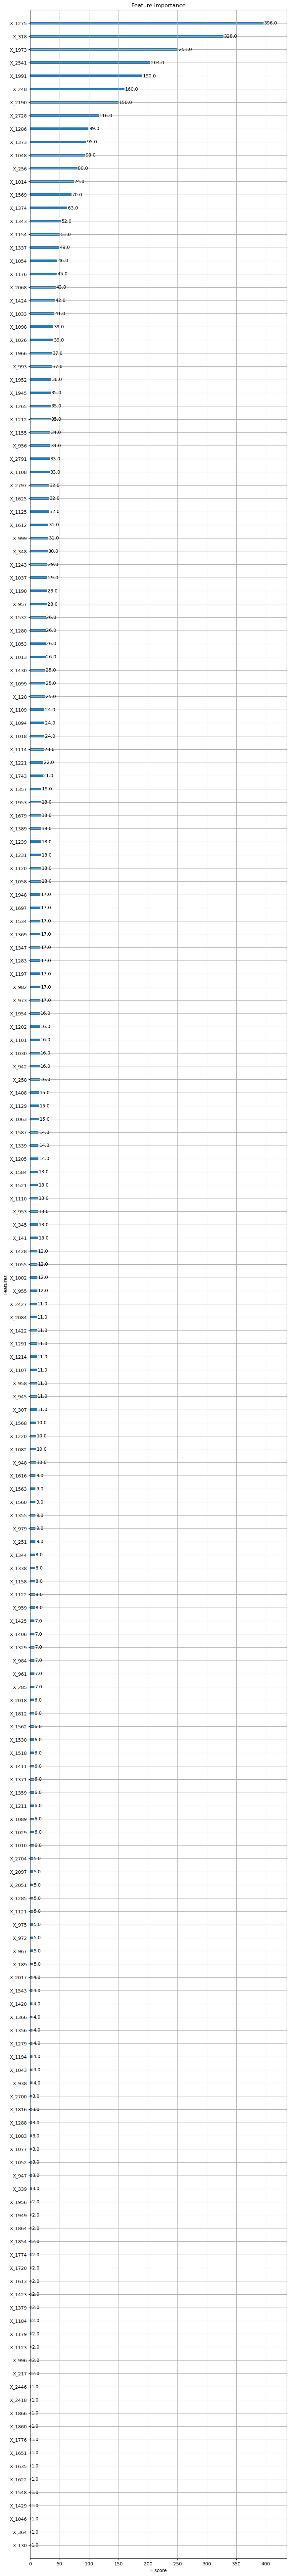

In [238]:
fig, ax = plt.subplots(figsize=(10, 100))
plot_importance(xgb_model, ax=ax, )
plt.savefig('./feature_importance_drop_a.png')

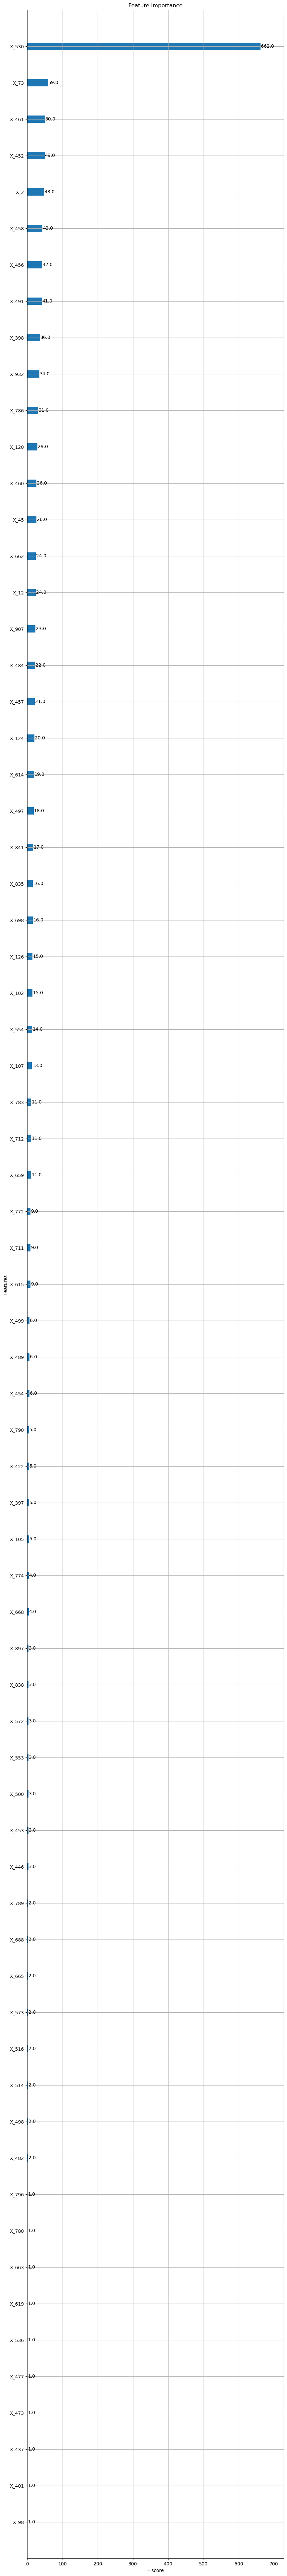

In [510]:
fig, ax = plt.subplots(figsize=(10, 100))
plot_importance(xgb_model2, ax=ax)
plt.savefig('./feature_importance_drop_to.png')

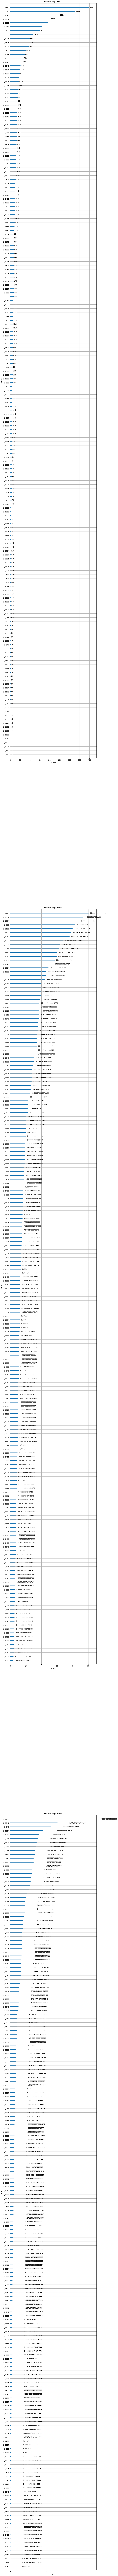

In [239]:
fig, ax = plt.subplots(3,1,figsize=(10,300))

importance_types = ['weight', 'cover', 'gain']

for i, imp_i in enumerate(importance_types):
    plot_importance(xgb_model, ax=ax[i], importance_type=imp_i, xlabel=imp_i)

plt.savefig('./feature_importance_drop_a_3type.png')

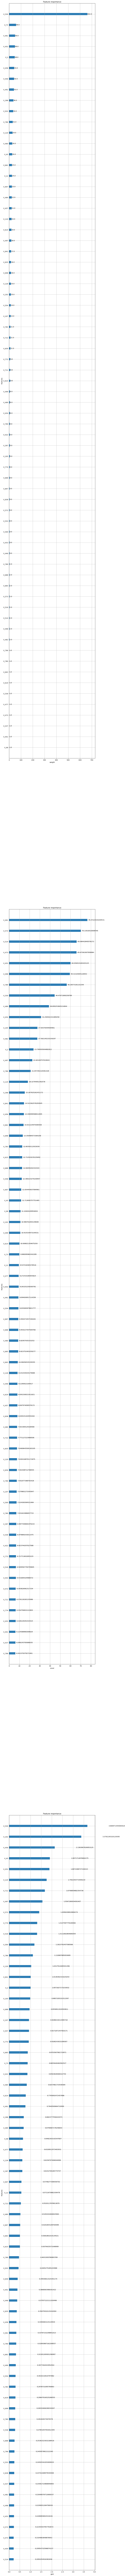

In [512]:
fig, ax = plt.subplots(3,1,figsize=(10,300))

importance_types = ['weight', 'cover', 'gain']

for i, imp_i in enumerate(importance_types):
    plot_importance(xgb_model2, ax=ax[i], importance_type=imp_i, xlabel=imp_i)

plt.savefig('./feature_importance_drop_to_3type.png')

In [348]:
# pred_probs = xgb_model.predict(dtest_x, ntree_limit=xgb_model.best_ntree_limit)
y_preds = xgb_model.predict(dtest_x, ntree_limit=xgb_model.best_ntree_limit)
preds_1 = np.round(y_preds).astype(int)
preds1 = pd.DataFrame(preds_1)
p1 = pd.Series(data = p1)
preds10 = pd.concat([preds1, p1], axis = 1)
preds10.columns = ['y_class', 'p1']
preds10.index = preds10['p1']
del preds10['p1']
preds10

y_class
p1          
3          1
4          0
5          1
6          1
7          0
..       ...
284        0
285        0
286        0
292        0
293        0

[67 rows x 1 columns]

In [528]:
preds10.describe()

y_class
count  67.000000
mean    0.283582
std     0.486358
min     0.000000
25%     0.000000
50%     0.000000
75%     1.000000
max     2.000000

In [520]:
y_preds = xgb_model.predict(dtest_x, ntree_limit=xgb_model.best_ntree_limit)
preds_2 = np.round(y_preds).astype(int)
preds2 = pd.DataFrame(preds_2)
p1 = pd.Series(data = p1)
preds20 = pd.concat([preds2, p1], axis = 1)
preds20.columns = ['y_class', 'p1']
preds20.index = preds20['p1']
del preds20['p1']
preds20

y_class
p1          
0          1
1          1
2          1
15         1
16         1
..       ...
305        1
306        1
307        1
308        1
309        1

[243 rows x 1 columns]

In [527]:
preds20.describe()

y_class
count    243.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0

In [261]:
y_preds = xgb_model.predict(dtest_x, ntree_limit=xgb_model.best_ntree_limit)
preds_3 = np.round(y_preds).astype(int)
preds3 = pd.DataFrame(preds_3)
p1 = pd.Series(data = p1)
preds30 = pd.concat([preds3, p1], axis = 1)
preds30.columns = ['y_class', 'p1']
preds30.index = preds30['p1']
del preds30['p1']
preds30

y_class
p1          
0          1
1          2
2          1
15         1
16         1
..       ...
305        2
306        1
307        1
308        2
309        2

[243 rows x 1 columns]

In [521]:
preds = pd.concat([preds10, preds20], axis = 0)
preds = preds.sort_index(ascending=True)
preds

y_class
p1          
0          1
1          1
2          1
3          1
4          0
..       ...
305        1
306        1
307        1
308        1
309        1

[310 rows x 1 columns]

In [522]:
sub['Y_Class'] = preds['y_class']
sub.to_csv('./t32_XGB_sep_ATOdata_com.csv', index = False)

In [523]:
sub.describe()

Y_Class
count  310.000000
mean     0.845161
std      0.371160
min      0.000000
25%      1.000000
50%      1.000000
75%      1.000000
max      2.000000

In [526]:
subm = pd.read_csv('/Users/kimminyoung/Desktop/Dacon_SmartFactory/t30_XGB_Dmatrix_Earlystopping_eta0035_testsize01(0.704).csv')
subm.describe()

Y_Class
count  310.000000
mean     0.893548
std      0.348307
min      0.000000
25%      1.000000
50%      1.000000
75%      1.000000
max      2.000000

In [98]:
y_pred = xgb_model.predict(dtest, ntree_limit=xgb_model.best_ntree_limit)
preds = np.round(y_pred).astype(int)
print(f1_score(y_test, preds, average = 'macro'))

0.6530173736877647


In [99]:
#t7_0.53219 ########성능 0.683 원래대로 진행 0.782
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, 
                                                    test_size=0.1, 
                                                    stratify=train_y, 
                                                    random_state=37)


dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)
#dtest_x = xgb.DMatrix(data=test_x)

params = {'max_depth' : 6,
          'eta': 0.04,
          'objective':'multi:softmax',
          'num_class':3,
          'eval_metric':'mlogloss',
#           'eval_set': [(X_test, y_test)], #적용이 안 되고 있다고 뜸
#           'early_stopping':100 #적용이 안 되고 있다고 뜸
          }
num_rounds = 400

wlist = [(dtrain, 'train'), (dtest, 'eval')]
xgb_model = xgb.train(params=params, 
                      dtrain=dtrain, 
                      num_boost_round=num_rounds, 
                      early_stopping_rounds=100, 
                      evals=wlist)

[0]	train-mlogloss:1.05928	eval-mlogloss:1.06846
[1]	train-mlogloss:1.02224	eval-mlogloss:1.03964
[2]	train-mlogloss:0.98753	eval-mlogloss:1.01551
[3]	train-mlogloss:0.95449	eval-mlogloss:0.99104
[4]	train-mlogloss:0.92392	eval-mlogloss:0.96798
[5]	train-mlogloss:0.89469	eval-mlogloss:0.94454
[6]	train-mlogloss:0.86730	eval-mlogloss:0.92149
[7]	train-mlogloss:0.84109	eval-mlogloss:0.90036
[8]	train-mlogloss:0.81629	eval-mlogloss:0.88033
[9]	train-mlogloss:0.79239	eval-mlogloss:0.85956
[10]	train-mlogloss:0.77003	eval-mlogloss:0.84263
[11]	train-mlogloss:0.74875	eval-mlogloss:0.82553
[12]	train-mlogloss:0.72855	eval-mlogloss:0.80987
[13]	train-mlogloss:0.70990	eval-mlogloss:0.79619
[14]	train-mlogloss:0.69126	eval-mlogloss:0.78199
[15]	train-mlogloss:0.67458	eval-mlogloss:0.76859
[16]	train-mlogloss:0.65735	eval-mlogloss:0.75758
[17]	train-mlogloss:0.64150	eval-mlogloss:0.74715
[18]	train-mlogloss:0.62598	eval-mlogloss:0.73522
[19]	train-mlogloss:0.61060	eval-mlogloss:0.72494
[20]	train

[163]	train-mlogloss:0.06951	eval-mlogloss:0.54001
[164]	train-mlogloss:0.06887	eval-mlogloss:0.53961
[165]	train-mlogloss:0.06811	eval-mlogloss:0.53860
[166]	train-mlogloss:0.06752	eval-mlogloss:0.53814
[167]	train-mlogloss:0.06689	eval-mlogloss:0.53932
[168]	train-mlogloss:0.06617	eval-mlogloss:0.53933
[169]	train-mlogloss:0.06552	eval-mlogloss:0.53895
[170]	train-mlogloss:0.06484	eval-mlogloss:0.54014
[171]	train-mlogloss:0.06418	eval-mlogloss:0.54057
[172]	train-mlogloss:0.06358	eval-mlogloss:0.54042
[173]	train-mlogloss:0.06300	eval-mlogloss:0.54039
[174]	train-mlogloss:0.06247	eval-mlogloss:0.54069
[175]	train-mlogloss:0.06187	eval-mlogloss:0.54067
[176]	train-mlogloss:0.06126	eval-mlogloss:0.53972
[177]	train-mlogloss:0.06071	eval-mlogloss:0.54002
[178]	train-mlogloss:0.06011	eval-mlogloss:0.54000
[179]	train-mlogloss:0.05962	eval-mlogloss:0.53936
[180]	train-mlogloss:0.05904	eval-mlogloss:0.53939
[181]	train-mlogloss:0.05853	eval-mlogloss:0.53913
[182]	train-mlogloss:0.05807	ev

In [100]:
y_pred = xgb_model.predict(dtest, ntree_limit=xgb_model.best_ntree_limit)
preds = np.round(y_pred).astype(int)
print(f1_score(y_test, preds, average = 'macro'))

0.782559847895601


In [103]:
#t7_0.53219 ########성능 0.683 원래에서 max_depth 7로 0.787 과적합 가능성 있음
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, 
                                                    test_size=0.1, 
                                                    stratify=train_y, 
                                                    random_state=37)


dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)
#dtest_x = xgb.DMatrix(data=test_x)

params = {'max_depth' : 7,
          'eta': 0.04,
          'objective':'multi:softmax',
          'num_class':3,
          'eval_metric':'mlogloss',
#           'eval_set': [(X_test, y_test)], #적용이 안 되고 있다고 뜸
#           'early_stopping':100 #적용이 안 되고 있다고 뜸
          }
num_rounds = 400

wlist = [(dtrain, 'train'), (dtest, 'eval')]
xgb_model = xgb.train(params=params, 
                      dtrain=dtrain, 
                      num_boost_round=num_rounds, 
                      early_stopping_rounds=100, 
                      evals=wlist)

[0]	train-mlogloss:1.05734	eval-mlogloss:1.06639
[1]	train-mlogloss:1.01836	eval-mlogloss:1.03465
[2]	train-mlogloss:0.98192	eval-mlogloss:1.00666
[3]	train-mlogloss:0.94688	eval-mlogloss:0.98095
[4]	train-mlogloss:0.91448	eval-mlogloss:0.95759
[5]	train-mlogloss:0.88443	eval-mlogloss:0.93223
[6]	train-mlogloss:0.85517	eval-mlogloss:0.90750
[7]	train-mlogloss:0.82821	eval-mlogloss:0.88531
[8]	train-mlogloss:0.80172	eval-mlogloss:0.86370
[9]	train-mlogloss:0.77609	eval-mlogloss:0.84379
[10]	train-mlogloss:0.75217	eval-mlogloss:0.82476
[11]	train-mlogloss:0.72932	eval-mlogloss:0.80693
[12]	train-mlogloss:0.70798	eval-mlogloss:0.79104
[13]	train-mlogloss:0.68855	eval-mlogloss:0.77681
[14]	train-mlogloss:0.66958	eval-mlogloss:0.76155
[15]	train-mlogloss:0.65132	eval-mlogloss:0.74939
[16]	train-mlogloss:0.63192	eval-mlogloss:0.73638
[17]	train-mlogloss:0.61405	eval-mlogloss:0.72359
[18]	train-mlogloss:0.59767	eval-mlogloss:0.71347
[19]	train-mlogloss:0.58050	eval-mlogloss:0.70147
[20]	train

[163]	train-mlogloss:0.04885	eval-mlogloss:0.52874
[164]	train-mlogloss:0.04832	eval-mlogloss:0.52860
[165]	train-mlogloss:0.04781	eval-mlogloss:0.52807
[166]	train-mlogloss:0.04726	eval-mlogloss:0.52934
[167]	train-mlogloss:0.04663	eval-mlogloss:0.53003
[168]	train-mlogloss:0.04610	eval-mlogloss:0.53017
[169]	train-mlogloss:0.04570	eval-mlogloss:0.53035
[170]	train-mlogloss:0.04516	eval-mlogloss:0.53122
[171]	train-mlogloss:0.04463	eval-mlogloss:0.53193
[172]	train-mlogloss:0.04414	eval-mlogloss:0.53294
[173]	train-mlogloss:0.04362	eval-mlogloss:0.53284
[174]	train-mlogloss:0.04310	eval-mlogloss:0.53328
[175]	train-mlogloss:0.04268	eval-mlogloss:0.53409
[176]	train-mlogloss:0.04219	eval-mlogloss:0.53437
[177]	train-mlogloss:0.04169	eval-mlogloss:0.53506
[178]	train-mlogloss:0.04123	eval-mlogloss:0.53469
[179]	train-mlogloss:0.04078	eval-mlogloss:0.53437


In [104]:
y_pred = xgb_model.predict(dtest, ntree_limit=xgb_model.best_ntree_limit)
preds = np.round(y_pred).astype(int)
print(f1_score(y_test, preds, average = 'macro'))

0.7877394636015325


In [105]:
#t7_0.53219 ########성능 0.683 원래에서 max_depth 10로 0.791
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, 
                                                    test_size=0.1, 
                                                    stratify=train_y, 
                                                    random_state=37)


dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)
#dtest_x = xgb.DMatrix(data=test_x)

params = {'max_depth' : 10,
          'eta': 0.03,
          'objective':'multi:softmax',
          'num_class':3,
          'eval_metric':'mlogloss',
#           'eval_set': [(X_test, y_test)], #적용이 안 되고 있다고 뜸
#           'early_stopping':100 #적용이 안 되고 있다고 뜸
          }
num_rounds = 400

wlist = [(dtrain, 'train'), (dtest, 'eval')]
xgb_model = xgb.train(params=params, 
                      dtrain=dtrain, 
                      num_boost_round=num_rounds, 
                      early_stopping_rounds=100, 
                      evals=wlist)

[0]	train-mlogloss:1.06473	eval-mlogloss:1.07224
[1]	train-mlogloss:1.03262	eval-mlogloss:1.05003
[2]	train-mlogloss:1.00198	eval-mlogloss:1.02696
[3]	train-mlogloss:0.97269	eval-mlogloss:1.00597
[4]	train-mlogloss:0.94468	eval-mlogloss:0.98503
[5]	train-mlogloss:0.91779	eval-mlogloss:0.96462
[6]	train-mlogloss:0.89202	eval-mlogloss:0.94676
[7]	train-mlogloss:0.86716	eval-mlogloss:0.92772
[8]	train-mlogloss:0.84327	eval-mlogloss:0.90891
[9]	train-mlogloss:0.82052	eval-mlogloss:0.89083
[10]	train-mlogloss:0.79841	eval-mlogloss:0.87388
[11]	train-mlogloss:0.77796	eval-mlogloss:0.85915
[12]	train-mlogloss:0.75698	eval-mlogloss:0.84447
[13]	train-mlogloss:0.73748	eval-mlogloss:0.83089
[14]	train-mlogloss:0.71823	eval-mlogloss:0.81684
[15]	train-mlogloss:0.69980	eval-mlogloss:0.80418
[16]	train-mlogloss:0.68107	eval-mlogloss:0.79105
[17]	train-mlogloss:0.66354	eval-mlogloss:0.77746
[18]	train-mlogloss:0.64592	eval-mlogloss:0.76592
[19]	train-mlogloss:0.62957	eval-mlogloss:0.75423
[20]	train

[163]	train-mlogloss:0.04835	eval-mlogloss:0.51480
[164]	train-mlogloss:0.04785	eval-mlogloss:0.51524
[165]	train-mlogloss:0.04734	eval-mlogloss:0.51564
[166]	train-mlogloss:0.04686	eval-mlogloss:0.51650
[167]	train-mlogloss:0.04635	eval-mlogloss:0.51691
[168]	train-mlogloss:0.04586	eval-mlogloss:0.51747
[169]	train-mlogloss:0.04536	eval-mlogloss:0.51727
[170]	train-mlogloss:0.04490	eval-mlogloss:0.51772
[171]	train-mlogloss:0.04442	eval-mlogloss:0.51807
[172]	train-mlogloss:0.04397	eval-mlogloss:0.51866
[173]	train-mlogloss:0.04353	eval-mlogloss:0.51901
[174]	train-mlogloss:0.04311	eval-mlogloss:0.51940
[175]	train-mlogloss:0.04267	eval-mlogloss:0.52013
[176]	train-mlogloss:0.04224	eval-mlogloss:0.51985
[177]	train-mlogloss:0.04184	eval-mlogloss:0.52027
[178]	train-mlogloss:0.04142	eval-mlogloss:0.51979
[179]	train-mlogloss:0.04101	eval-mlogloss:0.51993
[180]	train-mlogloss:0.04061	eval-mlogloss:0.52042
[181]	train-mlogloss:0.04022	eval-mlogloss:0.52069
[182]	train-mlogloss:0.03984	ev

In [106]:
y_pred = xgb_model.predict(dtest, ntree_limit=xgb_model.best_ntree_limit)
preds = np.round(y_pred).astype(int)
print(f1_score(y_test, preds, average = 'macro'))

0.7918075276087446


In [125]:
#t7_0.53219 ########성능 0.683 원래에서 eta 0.035로 0.807
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, 
                                                    test_size=0.1, 
                                                    stratify=train_y, 
                                                    random_state=37)


dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)
dtest_x = xgb.DMatrix(data=test_x)

params = {'max_depth' : 6,
          'eta': 0.035,
          'objective':'multi:softmax',
          'num_class':3,
          'eval_metric':'mlogloss'
          }
num_rounds = 400

wlist = [(dtrain, 'train'), (dtest, 'eval')]
xgb_model = xgb.train(params=params, 
                      dtrain=dtrain, 
                      num_boost_round=num_rounds, 
                      early_stopping_rounds=100, 
                      evals=wlist)

[0]	train-mlogloss:1.06414	eval-mlogloss:1.07218
[1]	train-mlogloss:1.03142	eval-mlogloss:1.04668
[2]	train-mlogloss:1.00052	eval-mlogloss:1.02519
[3]	train-mlogloss:0.97054	eval-mlogloss:1.00240
[4]	train-mlogloss:0.94299	eval-mlogloss:0.98364
[5]	train-mlogloss:0.91671	eval-mlogloss:0.96251
[6]	train-mlogloss:0.89149	eval-mlogloss:0.94173
[7]	train-mlogloss:0.86732	eval-mlogloss:0.92338
[8]	train-mlogloss:0.84442	eval-mlogloss:0.90463
[9]	train-mlogloss:0.82251	eval-mlogloss:0.88676
[10]	train-mlogloss:0.80135	eval-mlogloss:0.86907
[11]	train-mlogloss:0.78150	eval-mlogloss:0.85287
[12]	train-mlogloss:0.76243	eval-mlogloss:0.83708
[13]	train-mlogloss:0.74417	eval-mlogloss:0.82313
[14]	train-mlogloss:0.72705	eval-mlogloss:0.80971
[15]	train-mlogloss:0.71031	eval-mlogloss:0.79851
[16]	train-mlogloss:0.69456	eval-mlogloss:0.78730
[17]	train-mlogloss:0.67880	eval-mlogloss:0.77663
[18]	train-mlogloss:0.66375	eval-mlogloss:0.76521
[19]	train-mlogloss:0.64977	eval-mlogloss:0.75537
[20]	train

[163]	train-mlogloss:0.08658	eval-mlogloss:0.54319
[164]	train-mlogloss:0.08580	eval-mlogloss:0.54360
[165]	train-mlogloss:0.08513	eval-mlogloss:0.54335
[166]	train-mlogloss:0.08432	eval-mlogloss:0.54375
[167]	train-mlogloss:0.08355	eval-mlogloss:0.54421
[168]	train-mlogloss:0.08263	eval-mlogloss:0.54343
[169]	train-mlogloss:0.08186	eval-mlogloss:0.54386
[170]	train-mlogloss:0.08103	eval-mlogloss:0.54450
[171]	train-mlogloss:0.08021	eval-mlogloss:0.54430
[172]	train-mlogloss:0.07954	eval-mlogloss:0.54411
[173]	train-mlogloss:0.07879	eval-mlogloss:0.54337
[174]	train-mlogloss:0.07806	eval-mlogloss:0.54366
[175]	train-mlogloss:0.07740	eval-mlogloss:0.54397
[176]	train-mlogloss:0.07670	eval-mlogloss:0.54462
[177]	train-mlogloss:0.07605	eval-mlogloss:0.54556
[178]	train-mlogloss:0.07541	eval-mlogloss:0.54595
[179]	train-mlogloss:0.07477	eval-mlogloss:0.54635
[180]	train-mlogloss:0.07410	eval-mlogloss:0.54706
[181]	train-mlogloss:0.07353	eval-mlogloss:0.54824
[182]	train-mlogloss:0.07288	ev

In [126]:
y_pred = xgb_model.predict(dtest, ntree_limit=xgb_model.best_ntree_limit)
preds = np.round(y_pred).astype(int)
print(f1_score(y_test, preds, average = 'macro'))

0.8070874861572537


In [127]:
pred_probs = xgb_model.predict(dtest_x, ntree_limit=xgb_model.best_ntree_limit)
preds = np.round(pred_probs).astype(int)
sub3['Y_Class'] = preds
sub3.to_csv('./t30_XGB_Dmatrix_Earlystopping_eta0035_testsize01.csv', index = False)

In [209]:
#t7_0.53219 ########성능 0.683 원래에서 eta 0.035로 0.807
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, 
                                                    test_size=0.1, 
                                                    stratify=train_y, 
                                                    random_state=37)


dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)
dtest_x = xgb.DMatrix(data=test_x)

params = {'max_depth' : 6,
          'eta': 0.035,
          'objective':'multi:softmax',
          'num_class':3,
          'eval_metric':'mlogloss',
          'mim
          }
num_rounds = 400

wlist = [(dtrain, 'train'), (dtest, 'eval')]
xgb_model = xgb.train(params=params, 
                      dtrain=dtrain, 
                      num_boost_round=num_rounds, 
                      early_stopping_rounds=100, 
                      evals=wlist)

[0]	train-mlogloss:1.06476	eval-mlogloss:1.07003
[1]	train-mlogloss:1.03186	eval-mlogloss:1.04285
[2]	train-mlogloss:1.00172	eval-mlogloss:1.01975
[3]	train-mlogloss:0.97144	eval-mlogloss:0.99356
[4]	train-mlogloss:0.94495	eval-mlogloss:0.97263
[5]	train-mlogloss:0.91961	eval-mlogloss:0.95339
[6]	train-mlogloss:0.89479	eval-mlogloss:0.93569
[7]	train-mlogloss:0.87093	eval-mlogloss:0.91646
[8]	train-mlogloss:0.84802	eval-mlogloss:0.89749
[9]	train-mlogloss:0.82715	eval-mlogloss:0.88080
[10]	train-mlogloss:0.80594	eval-mlogloss:0.86444
[11]	train-mlogloss:0.78610	eval-mlogloss:0.84855
[12]	train-mlogloss:0.76587	eval-mlogloss:0.83653
[13]	train-mlogloss:0.74587	eval-mlogloss:0.82017
[14]	train-mlogloss:0.72722	eval-mlogloss:0.80825
[15]	train-mlogloss:0.71067	eval-mlogloss:0.79610
[16]	train-mlogloss:0.69537	eval-mlogloss:0.78181
[17]	train-mlogloss:0.67900	eval-mlogloss:0.76985
[18]	train-mlogloss:0.66371	eval-mlogloss:0.75763
[19]	train-mlogloss:0.64899	eval-mlogloss:0.74530
[20]	train

[163]	train-mlogloss:0.08591	eval-mlogloss:0.52134
[164]	train-mlogloss:0.08504	eval-mlogloss:0.52148
[165]	train-mlogloss:0.08404	eval-mlogloss:0.52163
[166]	train-mlogloss:0.08329	eval-mlogloss:0.52203
[167]	train-mlogloss:0.08245	eval-mlogloss:0.52252
[168]	train-mlogloss:0.08178	eval-mlogloss:0.52219
[169]	train-mlogloss:0.08100	eval-mlogloss:0.52257
[170]	train-mlogloss:0.08027	eval-mlogloss:0.52303
[171]	train-mlogloss:0.07960	eval-mlogloss:0.52287
[172]	train-mlogloss:0.07883	eval-mlogloss:0.52322
[173]	train-mlogloss:0.07803	eval-mlogloss:0.52406
[174]	train-mlogloss:0.07731	eval-mlogloss:0.52450
[175]	train-mlogloss:0.07650	eval-mlogloss:0.52496
[176]	train-mlogloss:0.07582	eval-mlogloss:0.52566
[177]	train-mlogloss:0.07500	eval-mlogloss:0.52617
[178]	train-mlogloss:0.07436	eval-mlogloss:0.52558
[179]	train-mlogloss:0.07373	eval-mlogloss:0.52521
[180]	train-mlogloss:0.07310	eval-mlogloss:0.52504
[181]	train-mlogloss:0.07245	eval-mlogloss:0.52559
[182]	train-mlogloss:0.07180	ev

In [210]:
y_pred = xgb_model.predict(dtest, ntree_limit=xgb_model.best_ntree_limit)
preds = np.round(y_pred).astype(int)
print(f1_score(y_test, preds, average = 'macro'))

0.7557720057720058


In [ ]:
pred_probs = xgb_model.predict(dtest_x, ntree_limit=xgb_model.best_ntree_limit)
preds = np.round(pred_probs).astype(int)
sub3['Y_Class'] = preds
sub3.to_csv('./t30_XGB_Dmatrix_Earlystopping_eta0035_testsize01.csv', index = False)

In [115]:
#t7_0.53219 ########성능 0.683 원래에서 eta 0.0375 0.0325 다 별로 0.75정도
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, 
                                                    test_size=0.1, 
                                                    stratify=train_y, 
                                                    random_state=37)


dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)
#dtest_x = xgb.DMatrix(data=test_x)

params = {'max_depth' : 12,
          'eta': 0.0375,
          'objective':'multi:softmax',
          'num_class':3,
          'eval_metric':'mlogloss'
          }
num_rounds = 400

wlist = [(dtrain, 'train'), (dtest, 'eval')]
xgb_model = xgb.train(params=params, 
                      dtrain=dtrain, 
                      num_boost_round=num_rounds, 
                      early_stopping_rounds=100, 
                      evals=wlist)

[0]	train-mlogloss:1.06171	eval-mlogloss:1.07032
[1]	train-mlogloss:1.02682	eval-mlogloss:1.04313
[2]	train-mlogloss:0.99400	eval-mlogloss:1.02033
[3]	train-mlogloss:0.96265	eval-mlogloss:0.99636
[4]	train-mlogloss:0.93359	eval-mlogloss:0.97661
[5]	train-mlogloss:0.90567	eval-mlogloss:0.95430
[6]	train-mlogloss:0.87923	eval-mlogloss:0.93251
[7]	train-mlogloss:0.85422	eval-mlogloss:0.91194
[8]	train-mlogloss:0.83012	eval-mlogloss:0.89322
[9]	train-mlogloss:0.80698	eval-mlogloss:0.87423
[10]	train-mlogloss:0.78549	eval-mlogloss:0.85701
[11]	train-mlogloss:0.76482	eval-mlogloss:0.83994
[12]	train-mlogloss:0.74516	eval-mlogloss:0.82386
[13]	train-mlogloss:0.72637	eval-mlogloss:0.80868
[14]	train-mlogloss:0.70849	eval-mlogloss:0.79731
[15]	train-mlogloss:0.69151	eval-mlogloss:0.78416
[16]	train-mlogloss:0.67608	eval-mlogloss:0.77204
[17]	train-mlogloss:0.65985	eval-mlogloss:0.76103
[18]	train-mlogloss:0.64482	eval-mlogloss:0.75066
[19]	train-mlogloss:0.63018	eval-mlogloss:0.73917
[20]	train

[163]	train-mlogloss:0.07872	eval-mlogloss:0.54809
[164]	train-mlogloss:0.07783	eval-mlogloss:0.54761
[165]	train-mlogloss:0.07715	eval-mlogloss:0.54759
[166]	train-mlogloss:0.07638	eval-mlogloss:0.54767
[167]	train-mlogloss:0.07557	eval-mlogloss:0.54739
[168]	train-mlogloss:0.07495	eval-mlogloss:0.54779
[169]	train-mlogloss:0.07432	eval-mlogloss:0.54767
[170]	train-mlogloss:0.07358	eval-mlogloss:0.54765
[171]	train-mlogloss:0.07289	eval-mlogloss:0.54762
[172]	train-mlogloss:0.07211	eval-mlogloss:0.54702
[173]	train-mlogloss:0.07148	eval-mlogloss:0.54680
[174]	train-mlogloss:0.07073	eval-mlogloss:0.54639
[175]	train-mlogloss:0.06991	eval-mlogloss:0.54587
[176]	train-mlogloss:0.06930	eval-mlogloss:0.54616
[177]	train-mlogloss:0.06876	eval-mlogloss:0.54656
[178]	train-mlogloss:0.06801	eval-mlogloss:0.54626
[179]	train-mlogloss:0.06731	eval-mlogloss:0.54550
[180]	train-mlogloss:0.06662	eval-mlogloss:0.54559
[181]	train-mlogloss:0.06597	eval-mlogloss:0.54533
[182]	train-mlogloss:0.06545	ev

In [116]:
y_pred = xgb_model.predict(dtest, ntree_limit=xgb_model.best_ntree_limit)
preds = np.round(y_pred).astype(int)
print(f1_score(y_test, preds, average = 'macro'))

0.7557720057720058


In [122]:
#t7_0.53219 ########성능 0.683 원래에서 eta 0.01 0.831
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, 
                                                    test_size=0.1, 
                                                    stratify=train_y, 
                                                    random_state=37)


dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)
#dtest_x = xgb.DMatrix(data=test_x)

params = {'max_depth' : 6,
          'eta': 0.01,
          'objective':'multi:softmax',
          'num_class':3,
          'eval_metric':'mlogloss'
          }
num_rounds = 800

wlist = [(dtrain, 'train'), (dtest, 'eval')]
xgb_model = xgb.train(params=params, 
                      dtrain=dtrain, 
                      num_boost_round=num_rounds, 
                      early_stopping_rounds=200, 
                      evals=wlist)

[0]	train-mlogloss:1.08868	eval-mlogloss:1.09099
[1]	train-mlogloss:1.07885	eval-mlogloss:1.08349
[2]	train-mlogloss:1.06925	eval-mlogloss:1.07627
[3]	train-mlogloss:1.05975	eval-mlogloss:1.06856
[4]	train-mlogloss:1.05045	eval-mlogloss:1.06172
[5]	train-mlogloss:1.04123	eval-mlogloss:1.05401
[6]	train-mlogloss:1.03221	eval-mlogloss:1.04809
[7]	train-mlogloss:1.02332	eval-mlogloss:1.04137
[8]	train-mlogloss:1.01452	eval-mlogloss:1.03429
[9]	train-mlogloss:1.00565	eval-mlogloss:1.02698
[10]	train-mlogloss:0.99716	eval-mlogloss:1.02091
[11]	train-mlogloss:0.98862	eval-mlogloss:1.01503
[12]	train-mlogloss:0.98038	eval-mlogloss:1.00899
[13]	train-mlogloss:0.97225	eval-mlogloss:1.00289
[14]	train-mlogloss:0.96408	eval-mlogloss:0.99688
[15]	train-mlogloss:0.95619	eval-mlogloss:0.99119
[16]	train-mlogloss:0.94820	eval-mlogloss:0.98527
[17]	train-mlogloss:0.94053	eval-mlogloss:0.97899
[18]	train-mlogloss:0.93292	eval-mlogloss:0.97292
[19]	train-mlogloss:0.92543	eval-mlogloss:0.96678
[20]	train

[163]	train-mlogloss:0.37334	eval-mlogloss:0.59510
[164]	train-mlogloss:0.37115	eval-mlogloss:0.59424
[165]	train-mlogloss:0.36908	eval-mlogloss:0.59375
[166]	train-mlogloss:0.36704	eval-mlogloss:0.59303
[167]	train-mlogloss:0.36484	eval-mlogloss:0.59219
[168]	train-mlogloss:0.36281	eval-mlogloss:0.59138
[169]	train-mlogloss:0.36062	eval-mlogloss:0.59087
[170]	train-mlogloss:0.35864	eval-mlogloss:0.59044
[171]	train-mlogloss:0.35675	eval-mlogloss:0.58977
[172]	train-mlogloss:0.35476	eval-mlogloss:0.58906
[173]	train-mlogloss:0.35262	eval-mlogloss:0.58827
[174]	train-mlogloss:0.35077	eval-mlogloss:0.58734
[175]	train-mlogloss:0.34906	eval-mlogloss:0.58678
[176]	train-mlogloss:0.34714	eval-mlogloss:0.58609
[177]	train-mlogloss:0.34527	eval-mlogloss:0.58535
[178]	train-mlogloss:0.34340	eval-mlogloss:0.58532
[179]	train-mlogloss:0.34151	eval-mlogloss:0.58453
[180]	train-mlogloss:0.33990	eval-mlogloss:0.58402
[181]	train-mlogloss:0.33804	eval-mlogloss:0.58333
[182]	train-mlogloss:0.33634	ev

[324]	train-mlogloss:0.18289	eval-mlogloss:0.54078
[325]	train-mlogloss:0.18231	eval-mlogloss:0.54063
[326]	train-mlogloss:0.18168	eval-mlogloss:0.54076
[327]	train-mlogloss:0.18106	eval-mlogloss:0.54090
[328]	train-mlogloss:0.18048	eval-mlogloss:0.54089
[329]	train-mlogloss:0.17980	eval-mlogloss:0.54114
[330]	train-mlogloss:0.17928	eval-mlogloss:0.54104
[331]	train-mlogloss:0.17865	eval-mlogloss:0.54114
[332]	train-mlogloss:0.17813	eval-mlogloss:0.54116
[333]	train-mlogloss:0.17753	eval-mlogloss:0.54144
[334]	train-mlogloss:0.17699	eval-mlogloss:0.54111
[335]	train-mlogloss:0.17633	eval-mlogloss:0.54126
[336]	train-mlogloss:0.17580	eval-mlogloss:0.54126
[337]	train-mlogloss:0.17521	eval-mlogloss:0.54142
[338]	train-mlogloss:0.17460	eval-mlogloss:0.54133
[339]	train-mlogloss:0.17413	eval-mlogloss:0.54133
[340]	train-mlogloss:0.17354	eval-mlogloss:0.54157
[341]	train-mlogloss:0.17299	eval-mlogloss:0.54173
[342]	train-mlogloss:0.17242	eval-mlogloss:0.54170
[343]	train-mlogloss:0.17185	ev

[485]	train-mlogloss:0.11187	eval-mlogloss:0.54316
[486]	train-mlogloss:0.11151	eval-mlogloss:0.54327
[487]	train-mlogloss:0.11126	eval-mlogloss:0.54335
[488]	train-mlogloss:0.11099	eval-mlogloss:0.54345
[489]	train-mlogloss:0.11068	eval-mlogloss:0.54362
[490]	train-mlogloss:0.11037	eval-mlogloss:0.54361
[491]	train-mlogloss:0.11010	eval-mlogloss:0.54370
[492]	train-mlogloss:0.10976	eval-mlogloss:0.54386
[493]	train-mlogloss:0.10941	eval-mlogloss:0.54382
[494]	train-mlogloss:0.10911	eval-mlogloss:0.54358
[495]	train-mlogloss:0.10885	eval-mlogloss:0.54357
[496]	train-mlogloss:0.10851	eval-mlogloss:0.54373
[497]	train-mlogloss:0.10823	eval-mlogloss:0.54379
[498]	train-mlogloss:0.10790	eval-mlogloss:0.54361
[499]	train-mlogloss:0.10761	eval-mlogloss:0.54361
[500]	train-mlogloss:0.10727	eval-mlogloss:0.54357
[501]	train-mlogloss:0.10703	eval-mlogloss:0.54353
[502]	train-mlogloss:0.10669	eval-mlogloss:0.54355
[503]	train-mlogloss:0.10643	eval-mlogloss:0.54350
[504]	train-mlogloss:0.10610	ev

In [123]:
y_pred = xgb_model.predict(dtest, ntree_limit=xgb_model.best_ntree_limit)
preds = np.round(y_pred).astype(int)
print(f1_score(y_test, preds, average = 'macro'))

0.7557720057720058


In [190]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

xgb_model = XGBClassifier(n_estimators=200)

X_train, X_val, y_train, y_val = train_test_split(train_x, train_y, 
                                                    test_size=0.1, 
                                                    stratify=train_y, 
                                                    random_state=37)

# 후보 파라미터 선정
params = {'max_depth':[6], 'min_child_weight':[1,3,5], 'colsample_bytree':[0.75,1]}
          #'learning_rate' :[0.01, 0.02, 0.03, 0.035]

# gridsearchcv 객체 정보 입력(어떤 모델, 파라미터 후보, 교차검증 몇 번)
gridcv = GridSearchCV(xgb_model, param_grid=params, cv=3)

# 파라미터 튜닝 시작
gridcv.fit(train_x, train_y, early_stopping_rounds=20, eval_metric='mlogloss', eval_set=[(X_val, y_val)])

#튜닝된 파라미터 출력
print(gridcv.best_params_)

[0]	validation_0-mlogloss:0.95927
[1]	validation_0-mlogloss:0.85181
[2]	validation_0-mlogloss:0.75319
[3]	validation_0-mlogloss:0.72759
[4]	validation_0-mlogloss:0.72671
[5]	validation_0-mlogloss:0.69939
[6]	validation_0-mlogloss:0.66953
[7]	validation_0-mlogloss:0.65160
[8]	validation_0-mlogloss:0.65946
[9]	validation_0-mlogloss:0.61611
[10]	validation_0-mlogloss:0.61855
[11]	validation_0-mlogloss:0.60403
[12]	validation_0-mlogloss:0.59930
[13]	validation_0-mlogloss:0.59560
[14]	validation_0-mlogloss:0.57280
[15]	validation_0-mlogloss:0.56851
[16]	validation_0-mlogloss:0.55139
[17]	validation_0-mlogloss:0.54871
[18]	validation_0-mlogloss:0.55955
[19]	validation_0-mlogloss:0.57247
[20]	validation_0-mlogloss:0.57112
[21]	validation_0-mlogloss:0.57502
[22]	validation_0-mlogloss:0.57584
[23]	validation_0-mlogloss:0.57856
[24]	validation_0-mlogloss:0.57598
[25]	validation_0-mlogloss:0.57346
[26]	validation_0-mlogloss:0.57668
[27]	validation_0-mlogloss:0.57791
[28]	validation_0-mlogloss:0.5

[28]	validation_0-mlogloss:0.53232
[29]	validation_0-mlogloss:0.53315
[30]	validation_0-mlogloss:0.52233
[31]	validation_0-mlogloss:0.52261
[32]	validation_0-mlogloss:0.53075
[33]	validation_0-mlogloss:0.53251
[34]	validation_0-mlogloss:0.52875
[35]	validation_0-mlogloss:0.52810
[36]	validation_0-mlogloss:0.54207
[37]	validation_0-mlogloss:0.54290
[38]	validation_0-mlogloss:0.53631
[0]	validation_0-mlogloss:0.89777
[1]	validation_0-mlogloss:0.76063
[2]	validation_0-mlogloss:0.66868
[3]	validation_0-mlogloss:0.60883
[4]	validation_0-mlogloss:0.55450
[5]	validation_0-mlogloss:0.52922
[6]	validation_0-mlogloss:0.50608
[7]	validation_0-mlogloss:0.48786
[8]	validation_0-mlogloss:0.47597
[9]	validation_0-mlogloss:0.46468
[10]	validation_0-mlogloss:0.44858
[11]	validation_0-mlogloss:0.44312
[12]	validation_0-mlogloss:0.44223
[13]	validation_0-mlogloss:0.44209
[14]	validation_0-mlogloss:0.43977
[15]	validation_0-mlogloss:0.43805
[16]	validation_0-mlogloss:0.43049
[17]	validation_0-mlogloss:0.4

[37]	validation_0-mlogloss:0.55547
[38]	validation_0-mlogloss:0.56283
[39]	validation_0-mlogloss:0.55983
[40]	validation_0-mlogloss:0.56468
[41]	validation_0-mlogloss:0.55980
[42]	validation_0-mlogloss:0.56168
[43]	validation_0-mlogloss:0.56228
[44]	validation_0-mlogloss:0.56161
[45]	validation_0-mlogloss:0.56492
[46]	validation_0-mlogloss:0.56491
[47]	validation_0-mlogloss:0.56115
[48]	validation_0-mlogloss:0.56128
[49]	validation_0-mlogloss:0.56020
[50]	validation_0-mlogloss:0.55857
[0]	validation_0-mlogloss:0.84658
[1]	validation_0-mlogloss:0.67239
[2]	validation_0-mlogloss:0.58583
[3]	validation_0-mlogloss:0.51811
[4]	validation_0-mlogloss:0.45745
[5]	validation_0-mlogloss:0.42760
[6]	validation_0-mlogloss:0.40417
[7]	validation_0-mlogloss:0.38103
[8]	validation_0-mlogloss:0.37547
[9]	validation_0-mlogloss:0.37695
[10]	validation_0-mlogloss:0.37481
[11]	validation_0-mlogloss:0.37520
[12]	validation_0-mlogloss:0.36853
[13]	validation_0-mlogloss:0.37304
[14]	validation_0-mlogloss:0.3

[33]	validation_0-mlogloss:0.04302
[34]	validation_0-mlogloss:0.04144
[35]	validation_0-mlogloss:0.04025
[36]	validation_0-mlogloss:0.03941
[37]	validation_0-mlogloss:0.03851
[38]	validation_0-mlogloss:0.03717
[39]	validation_0-mlogloss:0.03742
[40]	validation_0-mlogloss:0.03671
[41]	validation_0-mlogloss:0.03590
[42]	validation_0-mlogloss:0.03564
[43]	validation_0-mlogloss:0.03554
[44]	validation_0-mlogloss:0.03430
[45]	validation_0-mlogloss:0.03389
[46]	validation_0-mlogloss:0.03307
[47]	validation_0-mlogloss:0.03239
[48]	validation_0-mlogloss:0.03231
[49]	validation_0-mlogloss:0.03147
[50]	validation_0-mlogloss:0.03135
[51]	validation_0-mlogloss:0.03054
[52]	validation_0-mlogloss:0.03072
[53]	validation_0-mlogloss:0.03039
[54]	validation_0-mlogloss:0.03011
[55]	validation_0-mlogloss:0.02979
[56]	validation_0-mlogloss:0.02947
[57]	validation_0-mlogloss:0.02919
[58]	validation_0-mlogloss:0.02880
[59]	validation_0-mlogloss:0.02841
[60]	validation_0-mlogloss:0.02806
[61]	validation_0-ml

In [ ]:
# 1차적으로 튜닝된 파라미터를 가지고 객체 생성
xgb_model = XGBClassifier(n_estimators=1000, learning_rate=0.02, max_depth=7, min_child_weight=1, colsample_bytree=0.75, reg_alpha=0.03)

# 학습
xgb_model.fit(X_train, y_train, early_stopping_rounds=200, eval_metric='mlogloss', eval_set=[(X_val, y_val)])

In [185]:
#t7_0.53219 ########성능 0.683 train데이터내에서 train validation test 나눠서
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, 
                                                    test_size=0.1, 
                                                    stratify=train_y, 
                                                    random_state=37)

dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)
dtest_x = xgb.DMatrix(data=test_x)

params = {'max_depth' : 6,
          'eta': 0.035,
          'objective':'multi:softmax',
          'num_class':3,
          'eval_metric':'mlogloss',
          'eval_set': [(X_test, y_test)], #적용이 안 되고 있다고 뜸
          'early_stopping':100 #적용이 안 되고 있다고 뜸
          }
num_rounds = 400

wlist = [(dtrain, 'train'), (dtest, 'eval')]
xgb_model = xgb.train(params=params, 
                      dtrain=dtrain, 
                      num_boost_round=num_rounds, 
                      early_stopping_rounds=100, 
                      evals=wlist)

[00:00:25] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "early_stopping", "eval_set" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-mlogloss:1.05972	eval-mlogloss:1.07173
[1]	train-mlogloss:1.02242	eval-mlogloss:1.04669
[2]	train-mlogloss:0.98684	eval-mlogloss:1.02306
[3]	train-mlogloss:0.95344	eval-mlogloss:1.00009
[4]	train-mlogloss:0.92220	eval-mlogloss:0.97894
[5]	train-mlogloss:0.89228	eval-mlogloss:0.95901
[6]	train-mlogloss:0.86367	eval-mlogloss:0.94035
[7]	train-mlogloss:0.83676	eval-mlogloss:0.92235
[8]	train-mlogloss:0.81038	eval-mlogloss:0.90631
[9]	train-mlogloss:0.78413	eval-mlogloss:0.89372
[10]	train-mlogloss:0.76006	eval-mlog

In [71]:
print(xgb_model.best_iteration)
print(xgb_model.best_ntree_limit)
print(xgb_model.best_score)

43
44
0.7244108068943024


In [12]:
#모델 저장
with open('model_XGB_0683.pickle','wb') as fw:
    pickle.dump(xgb_model, fw)

In [550]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

xgb_model = XGBClassifier(n_estimators=200)

X_train, X_val, y_train, y_val = train_test_split(train_x, train_y, 
                                                    test_size=0.2, 
                                                    stratify=train_y, 
                                                    random_state=37)

# 후보 파라미터 선정
params = {'max_depth':[5,6,7], 'min_child_weight':[1,3,5],'gamma':[1,2,3,4]}
    #'colsample_bytree':[1]      
    #'learning_rate' :[0.01, 0.02, 0.03, 0.035]

# gridsearchcv 객체 정보 입력(어떤 모델, 파라미터 후보, 교차검증 몇 번)
gridcv = GridSearchCV(xgb_model, param_grid=params, cv=3)

# 파라미터 튜닝 시작
gridcv.fit(train_x, train_y, early_stopping_rounds=20, eval_metric='mlogloss', eval_set=[(X_val, y_val)])

#튜닝된 파라미터 출력
print(gridcv.best_params_)

[0]	validation_0-mlogloss:0.76130
[1]	validation_0-mlogloss:0.57273
[2]	validation_0-mlogloss:0.45744
[3]	validation_0-mlogloss:0.38406
[4]	validation_0-mlogloss:0.33785
[5]	validation_0-mlogloss:0.30933
[6]	validation_0-mlogloss:0.29204
[7]	validation_0-mlogloss:0.28245
[8]	validation_0-mlogloss:0.27816
[9]	validation_0-mlogloss:0.26696
[10]	validation_0-mlogloss:0.25861
[11]	validation_0-mlogloss:0.24608
[12]	validation_0-mlogloss:0.24323
[13]	validation_0-mlogloss:0.23568
[14]	validation_0-mlogloss:0.23041
[15]	validation_0-mlogloss:0.22626
[16]	validation_0-mlogloss:0.22955
[17]	validation_0-mlogloss:0.22681
[18]	validation_0-mlogloss:0.22463
[19]	validation_0-mlogloss:0.22290
[20]	validation_0-mlogloss:0.22153
[21]	validation_0-mlogloss:0.22044
[22]	validation_0-mlogloss:0.21957
[23]	validation_0-mlogloss:0.21888
[24]	validation_0-mlogloss:0.21833
[25]	validation_0-mlogloss:0.21790
[26]	validation_0-mlogloss:0.21755
[27]	validation_0-mlogloss:0.21727
[28]	validation_0-mlogloss:0.2

[21]	validation_0-mlogloss:0.11667
[22]	validation_0-mlogloss:0.11678
[23]	validation_0-mlogloss:0.11686
[24]	validation_0-mlogloss:0.11692
[25]	validation_0-mlogloss:0.11696
[26]	validation_0-mlogloss:0.11700
[27]	validation_0-mlogloss:0.11702
[28]	validation_0-mlogloss:0.11704
[29]	validation_0-mlogloss:0.11705
[30]	validation_0-mlogloss:0.11706
[31]	validation_0-mlogloss:0.11707
[32]	validation_0-mlogloss:0.11708
[33]	validation_0-mlogloss:0.11708
[0]	validation_0-mlogloss:0.77402
[1]	validation_0-mlogloss:0.57743
[2]	validation_0-mlogloss:0.44654
[3]	validation_0-mlogloss:0.33620
[4]	validation_0-mlogloss:0.25907
[5]	validation_0-mlogloss:0.21280
[6]	validation_0-mlogloss:0.18020
[7]	validation_0-mlogloss:0.15174
[8]	validation_0-mlogloss:0.13396
[9]	validation_0-mlogloss:0.12035
[10]	validation_0-mlogloss:0.11045
[11]	validation_0-mlogloss:0.10288
[12]	validation_0-mlogloss:0.09490
[13]	validation_0-mlogloss:0.09019
[14]	validation_0-mlogloss:0.08925
[15]	validation_0-mlogloss:0.0

[55]	validation_0-mlogloss:0.21617
[56]	validation_0-mlogloss:0.21617
[57]	validation_0-mlogloss:0.21617
[58]	validation_0-mlogloss:0.21617
[59]	validation_0-mlogloss:0.21617
[60]	validation_0-mlogloss:0.21617
[61]	validation_0-mlogloss:0.21617
[62]	validation_0-mlogloss:0.21617
[63]	validation_0-mlogloss:0.21617
[64]	validation_0-mlogloss:0.21617
[65]	validation_0-mlogloss:0.21617
[66]	validation_0-mlogloss:0.21617
[67]	validation_0-mlogloss:0.21617
[68]	validation_0-mlogloss:0.21617
[69]	validation_0-mlogloss:0.21617
[70]	validation_0-mlogloss:0.21617
[71]	validation_0-mlogloss:0.21617
[72]	validation_0-mlogloss:0.21617
[73]	validation_0-mlogloss:0.21617
[74]	validation_0-mlogloss:0.21617
[75]	validation_0-mlogloss:0.21617
[76]	validation_0-mlogloss:0.21617
[77]	validation_0-mlogloss:0.21617
[78]	validation_0-mlogloss:0.21617
[79]	validation_0-mlogloss:0.21617
[80]	validation_0-mlogloss:0.21617
[81]	validation_0-mlogloss:0.21617
[82]	validation_0-mlogloss:0.21617
[83]	validation_0-ml

[3]	validation_0-mlogloss:0.41913
[4]	validation_0-mlogloss:0.35671
[5]	validation_0-mlogloss:0.30877
[6]	validation_0-mlogloss:0.27496
[7]	validation_0-mlogloss:0.25548
[8]	validation_0-mlogloss:0.23510
[9]	validation_0-mlogloss:0.22358
[10]	validation_0-mlogloss:0.21189
[11]	validation_0-mlogloss:0.20740
[12]	validation_0-mlogloss:0.20014
[13]	validation_0-mlogloss:0.19564
[14]	validation_0-mlogloss:0.18485
[15]	validation_0-mlogloss:0.18226
[16]	validation_0-mlogloss:0.18043
[17]	validation_0-mlogloss:0.17805
[18]	validation_0-mlogloss:0.17361
[19]	validation_0-mlogloss:0.17014
[20]	validation_0-mlogloss:0.16636
[21]	validation_0-mlogloss:0.16499
[22]	validation_0-mlogloss:0.16216
[23]	validation_0-mlogloss:0.16046
[24]	validation_0-mlogloss:0.16045
[25]	validation_0-mlogloss:0.16045
[26]	validation_0-mlogloss:0.16044
[27]	validation_0-mlogloss:0.16044
[28]	validation_0-mlogloss:0.16044
[29]	validation_0-mlogloss:0.16045
[30]	validation_0-mlogloss:0.16045
[31]	validation_0-mlogloss:

[3]	validation_0-mlogloss:0.30268
[4]	validation_0-mlogloss:0.23916
[5]	validation_0-mlogloss:0.19010
[6]	validation_0-mlogloss:0.16288
[7]	validation_0-mlogloss:0.14302
[8]	validation_0-mlogloss:0.12279
[9]	validation_0-mlogloss:0.11052
[10]	validation_0-mlogloss:0.10685
[11]	validation_0-mlogloss:0.10257
[12]	validation_0-mlogloss:0.10385
[13]	validation_0-mlogloss:0.10019
[14]	validation_0-mlogloss:0.10078
[15]	validation_0-mlogloss:0.10133
[16]	validation_0-mlogloss:0.10179
[17]	validation_0-mlogloss:0.10132
[18]	validation_0-mlogloss:0.10163
[19]	validation_0-mlogloss:0.10186
[20]	validation_0-mlogloss:0.10204
[21]	validation_0-mlogloss:0.10217
[22]	validation_0-mlogloss:0.10227
[23]	validation_0-mlogloss:0.10235
[24]	validation_0-mlogloss:0.10240
[25]	validation_0-mlogloss:0.10244
[26]	validation_0-mlogloss:0.10247
[27]	validation_0-mlogloss:0.10249
[28]	validation_0-mlogloss:0.10250
[29]	validation_0-mlogloss:0.10251
[30]	validation_0-mlogloss:0.10252
[31]	validation_0-mlogloss:

[7]	validation_0-mlogloss:0.18754
[8]	validation_0-mlogloss:0.17835
[9]	validation_0-mlogloss:0.16675
[10]	validation_0-mlogloss:0.15831
[11]	validation_0-mlogloss:0.14884
[12]	validation_0-mlogloss:0.14702
[13]	validation_0-mlogloss:0.14284
[14]	validation_0-mlogloss:0.14247
[15]	validation_0-mlogloss:0.13460
[16]	validation_0-mlogloss:0.13498
[17]	validation_0-mlogloss:0.13531
[18]	validation_0-mlogloss:0.13559
[19]	validation_0-mlogloss:0.13471
[20]	validation_0-mlogloss:0.13488
[21]	validation_0-mlogloss:0.13502
[22]	validation_0-mlogloss:0.13512
[23]	validation_0-mlogloss:0.13520
[24]	validation_0-mlogloss:0.13526
[25]	validation_0-mlogloss:0.13531
[26]	validation_0-mlogloss:0.13534
[27]	validation_0-mlogloss:0.13537
[28]	validation_0-mlogloss:0.13539
[29]	validation_0-mlogloss:0.13540
[30]	validation_0-mlogloss:0.13541
[31]	validation_0-mlogloss:0.13542
[32]	validation_0-mlogloss:0.13543
[33]	validation_0-mlogloss:0.13543
[34]	validation_0-mlogloss:0.13543
[35]	validation_0-mlogl

[5]	validation_0-mlogloss:0.21050
[6]	validation_0-mlogloss:0.17874
[7]	validation_0-mlogloss:0.16121
[8]	validation_0-mlogloss:0.15018
[9]	validation_0-mlogloss:0.14790
[10]	validation_0-mlogloss:0.14313
[11]	validation_0-mlogloss:0.13655
[12]	validation_0-mlogloss:0.13668
[13]	validation_0-mlogloss:0.13696
[14]	validation_0-mlogloss:0.13726
[15]	validation_0-mlogloss:0.13753
[16]	validation_0-mlogloss:0.13777
[17]	validation_0-mlogloss:0.13796
[18]	validation_0-mlogloss:0.13652
[19]	validation_0-mlogloss:0.13663
[20]	validation_0-mlogloss:0.13673
[21]	validation_0-mlogloss:0.13679
[22]	validation_0-mlogloss:0.13684
[23]	validation_0-mlogloss:0.13688
[24]	validation_0-mlogloss:0.13691
[25]	validation_0-mlogloss:0.13693
[26]	validation_0-mlogloss:0.13695
[27]	validation_0-mlogloss:0.13696
[28]	validation_0-mlogloss:0.13696
[29]	validation_0-mlogloss:0.13697
[30]	validation_0-mlogloss:0.13697
[31]	validation_0-mlogloss:0.13698
[32]	validation_0-mlogloss:0.13698
[33]	validation_0-mloglos

[36]	validation_0-mlogloss:0.21313
[37]	validation_0-mlogloss:0.21313
[38]	validation_0-mlogloss:0.21314
[39]	validation_0-mlogloss:0.21314
[40]	validation_0-mlogloss:0.21314
[41]	validation_0-mlogloss:0.21315
[42]	validation_0-mlogloss:0.21315
[43]	validation_0-mlogloss:0.21315
[44]	validation_0-mlogloss:0.21315
[45]	validation_0-mlogloss:0.21315
[46]	validation_0-mlogloss:0.21315
[47]	validation_0-mlogloss:0.21316
[48]	validation_0-mlogloss:0.21316
[49]	validation_0-mlogloss:0.21316
[50]	validation_0-mlogloss:0.21316
[51]	validation_0-mlogloss:0.21316
[52]	validation_0-mlogloss:0.21316
[0]	validation_0-mlogloss:0.76541
[1]	validation_0-mlogloss:0.56862
[2]	validation_0-mlogloss:0.44355
[3]	validation_0-mlogloss:0.35185
[4]	validation_0-mlogloss:0.28596
[5]	validation_0-mlogloss:0.24286
[6]	validation_0-mlogloss:0.21183
[7]	validation_0-mlogloss:0.18971
[8]	validation_0-mlogloss:0.18414
[9]	validation_0-mlogloss:0.17224
[10]	validation_0-mlogloss:0.17116
[11]	validation_0-mlogloss:0.1

[133]	validation_0-mlogloss:0.19899
[134]	validation_0-mlogloss:0.19899
[135]	validation_0-mlogloss:0.19899
[136]	validation_0-mlogloss:0.19899
[137]	validation_0-mlogloss:0.19899
[138]	validation_0-mlogloss:0.19899
[139]	validation_0-mlogloss:0.19899
[140]	validation_0-mlogloss:0.19899
[141]	validation_0-mlogloss:0.19899
[142]	validation_0-mlogloss:0.19899
[143]	validation_0-mlogloss:0.19899
[144]	validation_0-mlogloss:0.19899
[145]	validation_0-mlogloss:0.19899
[146]	validation_0-mlogloss:0.19899
[147]	validation_0-mlogloss:0.19899
[148]	validation_0-mlogloss:0.19899
[149]	validation_0-mlogloss:0.19899
[0]	validation_0-mlogloss:0.73955
[1]	validation_0-mlogloss:0.52739
[2]	validation_0-mlogloss:0.39533
[3]	validation_0-mlogloss:0.30678
[4]	validation_0-mlogloss:0.24983
[5]	validation_0-mlogloss:0.21050
[6]	validation_0-mlogloss:0.17874
[7]	validation_0-mlogloss:0.16121
[8]	validation_0-mlogloss:0.15018
[9]	validation_0-mlogloss:0.14790
[10]	validation_0-mlogloss:0.14313
[11]	validati

[14]	validation_0-mlogloss:0.21705
[15]	validation_0-mlogloss:0.21680
[16]	validation_0-mlogloss:0.21667
[17]	validation_0-mlogloss:0.21522
[18]	validation_0-mlogloss:0.21518
[19]	validation_0-mlogloss:0.21517
[20]	validation_0-mlogloss:0.21517
[21]	validation_0-mlogloss:0.21518
[22]	validation_0-mlogloss:0.21520
[23]	validation_0-mlogloss:0.21483
[24]	validation_0-mlogloss:0.21485
[25]	validation_0-mlogloss:0.21486
[26]	validation_0-mlogloss:0.21488
[27]	validation_0-mlogloss:0.21489
[28]	validation_0-mlogloss:0.21491
[29]	validation_0-mlogloss:0.21492
[30]	validation_0-mlogloss:0.21493
[31]	validation_0-mlogloss:0.21493
[32]	validation_0-mlogloss:0.21494
[33]	validation_0-mlogloss:0.21310
[34]	validation_0-mlogloss:0.21311
[35]	validation_0-mlogloss:0.21312
[36]	validation_0-mlogloss:0.21313
[37]	validation_0-mlogloss:0.21313
[38]	validation_0-mlogloss:0.21314
[39]	validation_0-mlogloss:0.21314
[40]	validation_0-mlogloss:0.21314
[41]	validation_0-mlogloss:0.21315
[42]	validation_0-ml

[111]	validation_0-mlogloss:0.19899
[112]	validation_0-mlogloss:0.19899
[113]	validation_0-mlogloss:0.19899
[114]	validation_0-mlogloss:0.19899
[115]	validation_0-mlogloss:0.19899
[116]	validation_0-mlogloss:0.19899
[117]	validation_0-mlogloss:0.19899
[118]	validation_0-mlogloss:0.19899
[119]	validation_0-mlogloss:0.19899
[120]	validation_0-mlogloss:0.19899
[121]	validation_0-mlogloss:0.19899
[122]	validation_0-mlogloss:0.19899
[123]	validation_0-mlogloss:0.19899
[124]	validation_0-mlogloss:0.19899
[125]	validation_0-mlogloss:0.19899
[126]	validation_0-mlogloss:0.19899
[127]	validation_0-mlogloss:0.19899
[128]	validation_0-mlogloss:0.19899
[129]	validation_0-mlogloss:0.19899
[130]	validation_0-mlogloss:0.19899
[131]	validation_0-mlogloss:0.19899
[132]	validation_0-mlogloss:0.19899
[133]	validation_0-mlogloss:0.19899
[134]	validation_0-mlogloss:0.19899
[135]	validation_0-mlogloss:0.19899
[136]	validation_0-mlogloss:0.19899
[137]	validation_0-mlogloss:0.19899
[138]	validation_0-mlogloss:

[40]	validation_0-mlogloss:0.12261
[41]	validation_0-mlogloss:0.12261
[42]	validation_0-mlogloss:0.12261
[43]	validation_0-mlogloss:0.12261
[44]	validation_0-mlogloss:0.12261
[45]	validation_0-mlogloss:0.12261
[46]	validation_0-mlogloss:0.12261
[47]	validation_0-mlogloss:0.12261
[0]	validation_0-mlogloss:0.79600
[1]	validation_0-mlogloss:0.61995
[2]	validation_0-mlogloss:0.51132
[3]	validation_0-mlogloss:0.43339
[4]	validation_0-mlogloss:0.38116
[5]	validation_0-mlogloss:0.33817
[6]	validation_0-mlogloss:0.30436
[7]	validation_0-mlogloss:0.27741
[8]	validation_0-mlogloss:0.25570
[9]	validation_0-mlogloss:0.24869
[10]	validation_0-mlogloss:0.24083
[11]	validation_0-mlogloss:0.23339
[12]	validation_0-mlogloss:0.22301
[13]	validation_0-mlogloss:0.21746
[14]	validation_0-mlogloss:0.21705
[15]	validation_0-mlogloss:0.21680
[16]	validation_0-mlogloss:0.21667
[17]	validation_0-mlogloss:0.21522
[18]	validation_0-mlogloss:0.21518
[19]	validation_0-mlogloss:0.21517
[20]	validation_0-mlogloss:0.2

[90]	validation_0-mlogloss:0.19347
[91]	validation_0-mlogloss:0.19347
[92]	validation_0-mlogloss:0.19347
[93]	validation_0-mlogloss:0.19347
[94]	validation_0-mlogloss:0.19347
[95]	validation_0-mlogloss:0.19347
[96]	validation_0-mlogloss:0.19347
[97]	validation_0-mlogloss:0.19347
[98]	validation_0-mlogloss:0.19347
[99]	validation_0-mlogloss:0.19347
[100]	validation_0-mlogloss:0.19347
[101]	validation_0-mlogloss:0.19347
[102]	validation_0-mlogloss:0.19347
[103]	validation_0-mlogloss:0.19347
[104]	validation_0-mlogloss:0.19347
[105]	validation_0-mlogloss:0.19347
[106]	validation_0-mlogloss:0.19347
[107]	validation_0-mlogloss:0.19347
[108]	validation_0-mlogloss:0.19347
[109]	validation_0-mlogloss:0.19347
[110]	validation_0-mlogloss:0.19347
[111]	validation_0-mlogloss:0.19347
[112]	validation_0-mlogloss:0.19347
[113]	validation_0-mlogloss:0.19347
[114]	validation_0-mlogloss:0.19347
[115]	validation_0-mlogloss:0.19347
[116]	validation_0-mlogloss:0.19347
[117]	validation_0-mlogloss:0.19347
[1

[89]	validation_0-mlogloss:0.19028
[90]	validation_0-mlogloss:0.19028
[91]	validation_0-mlogloss:0.19028
[92]	validation_0-mlogloss:0.19028
[93]	validation_0-mlogloss:0.19028
[94]	validation_0-mlogloss:0.19028
[95]	validation_0-mlogloss:0.19028
[96]	validation_0-mlogloss:0.19028
[97]	validation_0-mlogloss:0.19028
[98]	validation_0-mlogloss:0.19028
[99]	validation_0-mlogloss:0.19028
[100]	validation_0-mlogloss:0.19028
[101]	validation_0-mlogloss:0.19028
[102]	validation_0-mlogloss:0.19028
[103]	validation_0-mlogloss:0.19028
[104]	validation_0-mlogloss:0.19028
[105]	validation_0-mlogloss:0.19028
[106]	validation_0-mlogloss:0.19028
[107]	validation_0-mlogloss:0.19028
[0]	validation_0-mlogloss:0.75047
[1]	validation_0-mlogloss:0.55456
[2]	validation_0-mlogloss:0.42989
[3]	validation_0-mlogloss:0.34642
[4]	validation_0-mlogloss:0.29277
[5]	validation_0-mlogloss:0.24739
[6]	validation_0-mlogloss:0.22640
[7]	validation_0-mlogloss:0.20896
[8]	validation_0-mlogloss:0.20373
[9]	validation_0-mlog

[10]	validation_0-mlogloss:0.21426
[11]	validation_0-mlogloss:0.21256
[12]	validation_0-mlogloss:0.20731
[13]	validation_0-mlogloss:0.20338
[14]	validation_0-mlogloss:0.20044
[15]	validation_0-mlogloss:0.19823
[16]	validation_0-mlogloss:0.19972
[17]	validation_0-mlogloss:0.19830
[18]	validation_0-mlogloss:0.19721
[19]	validation_0-mlogloss:0.19637
[20]	validation_0-mlogloss:0.19572
[21]	validation_0-mlogloss:0.19522
[22]	validation_0-mlogloss:0.19483
[23]	validation_0-mlogloss:0.19453
[24]	validation_0-mlogloss:0.19429
[25]	validation_0-mlogloss:0.19411
[26]	validation_0-mlogloss:0.19397
[27]	validation_0-mlogloss:0.19386
[28]	validation_0-mlogloss:0.19377
[29]	validation_0-mlogloss:0.19370
[30]	validation_0-mlogloss:0.19365
[31]	validation_0-mlogloss:0.19361
[32]	validation_0-mlogloss:0.19358
[33]	validation_0-mlogloss:0.19355
[34]	validation_0-mlogloss:0.19353
[35]	validation_0-mlogloss:0.19352
[36]	validation_0-mlogloss:0.19351
[37]	validation_0-mlogloss:0.19350
[38]	validation_0-ml

[7]	validation_0-mlogloss:0.23384
[8]	validation_0-mlogloss:0.22535
[9]	validation_0-mlogloss:0.21995
[10]	validation_0-mlogloss:0.21128
[11]	validation_0-mlogloss:0.20955
[12]	validation_0-mlogloss:0.20421
[13]	validation_0-mlogloss:0.20023
[14]	validation_0-mlogloss:0.19725
[15]	validation_0-mlogloss:0.19502
[16]	validation_0-mlogloss:0.19654
[17]	validation_0-mlogloss:0.19511
[18]	validation_0-mlogloss:0.19401
[19]	validation_0-mlogloss:0.19316
[20]	validation_0-mlogloss:0.19251
[21]	validation_0-mlogloss:0.19201
[22]	validation_0-mlogloss:0.19162
[23]	validation_0-mlogloss:0.19132
[24]	validation_0-mlogloss:0.19109
[25]	validation_0-mlogloss:0.19091
[26]	validation_0-mlogloss:0.19077
[27]	validation_0-mlogloss:0.19066
[28]	validation_0-mlogloss:0.19058
[29]	validation_0-mlogloss:0.19051
[30]	validation_0-mlogloss:0.19046
[31]	validation_0-mlogloss:0.19042
[32]	validation_0-mlogloss:0.19039
[33]	validation_0-mlogloss:0.19037
[34]	validation_0-mlogloss:0.19035
[35]	validation_0-mlogl

[12]	validation_0-mlogloss:0.18745
[13]	validation_0-mlogloss:0.18740
[14]	validation_0-mlogloss:0.18744
[15]	validation_0-mlogloss:0.18751
[16]	validation_0-mlogloss:0.18759
[17]	validation_0-mlogloss:0.18766
[18]	validation_0-mlogloss:0.18772
[19]	validation_0-mlogloss:0.18777
[20]	validation_0-mlogloss:0.18780
[21]	validation_0-mlogloss:0.18783
[22]	validation_0-mlogloss:0.18785
[23]	validation_0-mlogloss:0.18787
[24]	validation_0-mlogloss:0.18788
[25]	validation_0-mlogloss:0.18789
[26]	validation_0-mlogloss:0.18790
[27]	validation_0-mlogloss:0.18790
[28]	validation_0-mlogloss:0.18791
[29]	validation_0-mlogloss:0.18791
[30]	validation_0-mlogloss:0.18791
[31]	validation_0-mlogloss:0.18791
[32]	validation_0-mlogloss:0.18791
[33]	validation_0-mlogloss:0.18792
[0]	validation_0-mlogloss:0.77027
[1]	validation_0-mlogloss:0.58262
[2]	validation_0-mlogloss:0.45606
[3]	validation_0-mlogloss:0.35716
[4]	validation_0-mlogloss:0.29743
[5]	validation_0-mlogloss:0.26444
[6]	validation_0-mlogloss:

[28]	validation_0-mlogloss:0.17843
[29]	validation_0-mlogloss:0.17843
[30]	validation_0-mlogloss:0.17844
[31]	validation_0-mlogloss:0.17844
[32]	validation_0-mlogloss:0.17844
[0]	validation_0-mlogloss:0.75229
[1]	validation_0-mlogloss:0.55797
[2]	validation_0-mlogloss:0.42403
[3]	validation_0-mlogloss:0.32716
[4]	validation_0-mlogloss:0.25753
[5]	validation_0-mlogloss:0.23411
[6]	validation_0-mlogloss:0.20726
[7]	validation_0-mlogloss:0.18078
[8]	validation_0-mlogloss:0.15836
[9]	validation_0-mlogloss:0.15456
[10]	validation_0-mlogloss:0.14527
[11]	validation_0-mlogloss:0.14386
[12]	validation_0-mlogloss:0.14302
[13]	validation_0-mlogloss:0.14253
[14]	validation_0-mlogloss:0.14223
[15]	validation_0-mlogloss:0.14205
[16]	validation_0-mlogloss:0.14194
[17]	validation_0-mlogloss:0.14186
[18]	validation_0-mlogloss:0.14182
[19]	validation_0-mlogloss:0.14179
[20]	validation_0-mlogloss:0.14177
[21]	validation_0-mlogloss:0.14175
[22]	validation_0-mlogloss:0.14175
[23]	validation_0-mlogloss:0.1

[21]	validation_0-mlogloss:0.14296
[22]	validation_0-mlogloss:0.14294
[23]	validation_0-mlogloss:0.14292
[24]	validation_0-mlogloss:0.14291
[25]	validation_0-mlogloss:0.14290
[26]	validation_0-mlogloss:0.14290
[27]	validation_0-mlogloss:0.14290
[28]	validation_0-mlogloss:0.14290
[29]	validation_0-mlogloss:0.14289
[30]	validation_0-mlogloss:0.14289
[31]	validation_0-mlogloss:0.14289
[32]	validation_0-mlogloss:0.14289
[33]	validation_0-mlogloss:0.14289
[34]	validation_0-mlogloss:0.14290
[35]	validation_0-mlogloss:0.14290
[36]	validation_0-mlogloss:0.14290
[37]	validation_0-mlogloss:0.14290
[38]	validation_0-mlogloss:0.14290
[39]	validation_0-mlogloss:0.14290
[40]	validation_0-mlogloss:0.14290
[41]	validation_0-mlogloss:0.14290
[42]	validation_0-mlogloss:0.14290
[43]	validation_0-mlogloss:0.14290
[44]	validation_0-mlogloss:0.14290
[45]	validation_0-mlogloss:0.14290
[46]	validation_0-mlogloss:0.14290
[47]	validation_0-mlogloss:0.14290
[48]	validation_0-mlogloss:0.14290
[49]	validation_0-ml

[5]	validation_0-mlogloss:0.26296
[6]	validation_0-mlogloss:0.24104
[7]	validation_0-mlogloss:0.22200
[8]	validation_0-mlogloss:0.21784
[9]	validation_0-mlogloss:0.20412
[10]	validation_0-mlogloss:0.20286
[11]	validation_0-mlogloss:0.20227
[12]	validation_0-mlogloss:0.19212
[13]	validation_0-mlogloss:0.19202
[14]	validation_0-mlogloss:0.19201
[15]	validation_0-mlogloss:0.19046
[16]	validation_0-mlogloss:0.19052
[17]	validation_0-mlogloss:0.19057
[18]	validation_0-mlogloss:0.19061
[19]	validation_0-mlogloss:0.19065
[20]	validation_0-mlogloss:0.19068
[21]	validation_0-mlogloss:0.19070
[22]	validation_0-mlogloss:0.19072
[23]	validation_0-mlogloss:0.19073
[24]	validation_0-mlogloss:0.19074
[25]	validation_0-mlogloss:0.19075
[26]	validation_0-mlogloss:0.19075
[27]	validation_0-mlogloss:0.19076
[28]	validation_0-mlogloss:0.19076
[29]	validation_0-mlogloss:0.19076
[30]	validation_0-mlogloss:0.19076
[31]	validation_0-mlogloss:0.19076
[32]	validation_0-mlogloss:0.19076
[33]	validation_0-mloglos

[6]	validation_0-mlogloss:0.23667
[7]	validation_0-mlogloss:0.22766
[8]	validation_0-mlogloss:0.20996
[9]	validation_0-mlogloss:0.20327
[10]	validation_0-mlogloss:0.19030
[11]	validation_0-mlogloss:0.18893
[12]	validation_0-mlogloss:0.18813
[13]	validation_0-mlogloss:0.17808
[14]	validation_0-mlogloss:0.17779
[15]	validation_0-mlogloss:0.17762
[16]	validation_0-mlogloss:0.17752
[17]	validation_0-mlogloss:0.17746
[18]	validation_0-mlogloss:0.17743
[19]	validation_0-mlogloss:0.17740
[20]	validation_0-mlogloss:0.17357
[21]	validation_0-mlogloss:0.17355
[22]	validation_0-mlogloss:0.17354
[23]	validation_0-mlogloss:0.17353
[24]	validation_0-mlogloss:0.17353
[25]	validation_0-mlogloss:0.17352
[26]	validation_0-mlogloss:0.17352
[27]	validation_0-mlogloss:0.17352
[28]	validation_0-mlogloss:0.17352
[29]	validation_0-mlogloss:0.17352
[30]	validation_0-mlogloss:0.17352
[31]	validation_0-mlogloss:0.17352
[32]	validation_0-mlogloss:0.17352
[33]	validation_0-mlogloss:0.17352
[34]	validation_0-mloglo

[49]	validation_0-mlogloss:0.20123
[50]	validation_0-mlogloss:0.20123
[51]	validation_0-mlogloss:0.20123
[52]	validation_0-mlogloss:0.20123
[53]	validation_0-mlogloss:0.20123
[54]	validation_0-mlogloss:0.20123
[55]	validation_0-mlogloss:0.20123
[56]	validation_0-mlogloss:0.20123
[57]	validation_0-mlogloss:0.20123
[58]	validation_0-mlogloss:0.20123
[59]	validation_0-mlogloss:0.20123
[60]	validation_0-mlogloss:0.20123
[61]	validation_0-mlogloss:0.20123
[62]	validation_0-mlogloss:0.20123
[63]	validation_0-mlogloss:0.20123
[64]	validation_0-mlogloss:0.20123
[65]	validation_0-mlogloss:0.20123
[66]	validation_0-mlogloss:0.20123
[67]	validation_0-mlogloss:0.20123
[68]	validation_0-mlogloss:0.20123
[69]	validation_0-mlogloss:0.20123
[70]	validation_0-mlogloss:0.20123
[71]	validation_0-mlogloss:0.20123
[72]	validation_0-mlogloss:0.20123
[73]	validation_0-mlogloss:0.20123
[74]	validation_0-mlogloss:0.20123
[75]	validation_0-mlogloss:0.20123
[76]	validation_0-mlogloss:0.20123
[77]	validation_0-ml

[6]	validation_0-mlogloss:0.24520
[7]	validation_0-mlogloss:0.22639
[8]	validation_0-mlogloss:0.21167
[9]	validation_0-mlogloss:0.20951
[10]	validation_0-mlogloss:0.20847
[11]	validation_0-mlogloss:0.20805
[12]	validation_0-mlogloss:0.20794
[13]	validation_0-mlogloss:0.20797
[14]	validation_0-mlogloss:0.20689
[15]	validation_0-mlogloss:0.20042
[16]	validation_0-mlogloss:0.20053
[17]	validation_0-mlogloss:0.20062
[18]	validation_0-mlogloss:0.20069
[19]	validation_0-mlogloss:0.20075
[20]	validation_0-mlogloss:0.20079
[21]	validation_0-mlogloss:0.20082
[22]	validation_0-mlogloss:0.20085
[23]	validation_0-mlogloss:0.20086
[24]	validation_0-mlogloss:0.20088
[25]	validation_0-mlogloss:0.20089
[26]	validation_0-mlogloss:0.20090
[27]	validation_0-mlogloss:0.20090
[28]	validation_0-mlogloss:0.20091
[29]	validation_0-mlogloss:0.20091
[30]	validation_0-mlogloss:0.20091
[31]	validation_0-mlogloss:0.20091
[32]	validation_0-mlogloss:0.20091
[33]	validation_0-mlogloss:0.20092
[34]	validation_0-mloglo

[13]	validation_0-mlogloss:0.20983
[14]	validation_0-mlogloss:0.20771
[15]	validation_0-mlogloss:0.20615
[16]	validation_0-mlogloss:0.20499
[17]	validation_0-mlogloss:0.20430
[18]	validation_0-mlogloss:0.20357
[19]	validation_0-mlogloss:0.20302
[20]	validation_0-mlogloss:0.20260
[21]	validation_0-mlogloss:0.20228
[22]	validation_0-mlogloss:0.20204
[23]	validation_0-mlogloss:0.20185
[24]	validation_0-mlogloss:0.20171
[25]	validation_0-mlogloss:0.20160
[26]	validation_0-mlogloss:0.20151
[27]	validation_0-mlogloss:0.20145
[28]	validation_0-mlogloss:0.20140
[29]	validation_0-mlogloss:0.20136
[30]	validation_0-mlogloss:0.20133
[31]	validation_0-mlogloss:0.20131
[32]	validation_0-mlogloss:0.20129
[33]	validation_0-mlogloss:0.20128
[34]	validation_0-mlogloss:0.20127
[35]	validation_0-mlogloss:0.20126
[36]	validation_0-mlogloss:0.20125
[37]	validation_0-mlogloss:0.20125
[38]	validation_0-mlogloss:0.20124
[39]	validation_0-mlogloss:0.20124
[40]	validation_0-mlogloss:0.20124
[41]	validation_0-ml

[90]	validation_0-mlogloss:0.19776
[91]	validation_0-mlogloss:0.19776
[92]	validation_0-mlogloss:0.19776
[93]	validation_0-mlogloss:0.19776
[94]	validation_0-mlogloss:0.19776
[95]	validation_0-mlogloss:0.19776
[96]	validation_0-mlogloss:0.19776
[97]	validation_0-mlogloss:0.19776
[98]	validation_0-mlogloss:0.19776
[99]	validation_0-mlogloss:0.19776
[100]	validation_0-mlogloss:0.19776
[101]	validation_0-mlogloss:0.19776
[102]	validation_0-mlogloss:0.19776
[103]	validation_0-mlogloss:0.19776
[104]	validation_0-mlogloss:0.19776
[105]	validation_0-mlogloss:0.19776
[106]	validation_0-mlogloss:0.19776
[107]	validation_0-mlogloss:0.19776
[108]	validation_0-mlogloss:0.19776
[109]	validation_0-mlogloss:0.19776
[110]	validation_0-mlogloss:0.19776
[111]	validation_0-mlogloss:0.19776
[112]	validation_0-mlogloss:0.19776
[113]	validation_0-mlogloss:0.19776
[114]	validation_0-mlogloss:0.19776
[115]	validation_0-mlogloss:0.19776
[116]	validation_0-mlogloss:0.19776
[117]	validation_0-mlogloss:0.19776
[1

[48]	validation_0-mlogloss:0.18867
[49]	validation_0-mlogloss:0.18867
[50]	validation_0-mlogloss:0.18867
[51]	validation_0-mlogloss:0.18867
[52]	validation_0-mlogloss:0.18867
[53]	validation_0-mlogloss:0.18867
[54]	validation_0-mlogloss:0.18867
[55]	validation_0-mlogloss:0.18867
[56]	validation_0-mlogloss:0.18867
[57]	validation_0-mlogloss:0.18867
[58]	validation_0-mlogloss:0.18867
[59]	validation_0-mlogloss:0.18867
[60]	validation_0-mlogloss:0.18867
[61]	validation_0-mlogloss:0.18867
[62]	validation_0-mlogloss:0.18867
[63]	validation_0-mlogloss:0.18867
[64]	validation_0-mlogloss:0.18867
[65]	validation_0-mlogloss:0.18867
[66]	validation_0-mlogloss:0.18867
[67]	validation_0-mlogloss:0.18867
[68]	validation_0-mlogloss:0.18867
[69]	validation_0-mlogloss:0.18867
[70]	validation_0-mlogloss:0.18867
[71]	validation_0-mlogloss:0.18867
[0]	validation_0-mlogloss:0.72209
[1]	validation_0-mlogloss:0.50571
[2]	validation_0-mlogloss:0.36417
[3]	validation_0-mlogloss:0.26675
[4]	validation_0-mloglos

In [282]:
list(np.array([1,2,3,4]).astype(float))

[1.0, 2.0, 3.0, 4.0]

In [303]:
params = {'max_depth':6, 
          'min_child_weight':3,
          'min_split_loss':3,
          'colsample_bytree':1,
          'learning_rate' :0.035
         }

dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)
dtest_x = xgb.DMatrix(data=test_x)

res = xgb.cv(params, dtrain, num_boost_round=20, nfold=5, stratified=True,
folds=None, metrics=('mlogloss'),obj=None, feval=None, maximize=False,
early_stopping_rounds=10, fpreproc=None, as_pandas=True,
verbose_eval=True, show_stdv=True, seed=37, callbacks=None, shuffle=True)

XGBoostError: [18:01:10] /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/metric/multiclass_metric.cu:35: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) 1   libxgboost.dylib                    0x00000001666a8705 dmlc::LogMessageFatal::~LogMessageFatal() + 117
  [bt] (1) 2   libxgboost.dylib                    0x00000001667bfb9a xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const + 234
  [bt] (2) 3   libxgboost.dylib                    0x00000001667bf9f8 xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CpuReduceMetrics(xgboost::HostDeviceVector<float> const&, xgboost::HostDeviceVector<float> const&, xgboost::HostDeviceVector<float> const&, unsigned long, int) const + 568
  [bt] (3) 4   libxgboost.dylib                    0x00000001667bf722 xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboost::HostDeviceVector<float> const&, xgboost::MetaInfo const&, bool) + 1106
  [bt] (4) 5   libxgboost.dylib                    0x000000016677d305 xgboost::LearnerImpl::EvalOneIter(int, std::__1::vector<std::__1::shared_ptr<xgboost::DMatrix>, std::__1::allocator<std::__1::shared_ptr<xgboost::DMatrix> > > const&, std::__1::vector<std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> >, std::__1::allocator<std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> > > > const&) + 2357
  [bt] (5) 6   libxgboost.dylib                    0x00000001666acb87 XGBoosterEvalOneIter + 263
  [bt] (6) 7   libffi.8.dylib                      0x0000000109c2ea22 ffi_call_unix64 + 82
  [bt] (7) 8   ???                                 0x0000000302c14930 0x0 + 12931123504



In [300]:
# from xgboost import XGBClassifier
# from sklearn.model_selection import GridSearchCV



# X_train, X_val, y_train, y_val = train_test_split(train_x, train_y, 
#                                                     test_size=0.2, 
#                                                     stratify=train_y, 
#                                                     random_state=37)


# dtrain = xgb.DMatrix(data=X_train, label=y_train)
# dtest = xgb.DMatrix(data=X_test, label=y_test)
# dtest_x = xgb.DMatrix(data=test_x)
# #n_estimators와 num_boost_rounds는 같다

# num_rounds = 400

# wlist = [(dtrain, 'train'), (dtest, 'eval')]

# params = {'max_depth':6, 
#           'min_child_weight':3,
#            'min_split_loss':3,
#           'colsample_bytree':1,
#           'learning_rate' :0.035
#          }

# params2 = {'max_depth':[5,6,7], 
#           'min_child_weight':[1,3,5],
#            'min_split_loss':[1,2,3],
#           'colsample_bytree':[0.5,0.75, 1],
#           'learning_rate' :[0.01, 0.03,0.035, 0.04]
#          }
# xgb_model = xgb.train(params=params, 
#                       dtrain=dtrain, 
#                       num_boost_round=num_rounds, 
#                       evals=wlist,
#                       early_stopping_rounds=100 
#                       )
# # 후보 파라미터 선정

        

# # gridsearchcv 객체 정보 입력(어떤 모델, 파라미터 후보, 교차검증 몇 번)
# gridcv = GridSearchCV(xgb_model, param_grid=params2, cv=3)

# # 파라미터 튜닝 시작
# gridcv.fit(train_x, train_y, early_stopping_rounds=20, eval_metric='mlogloss', eval_set=[(X_val, y_val)])

# #튜닝된 파라미터 출력
# print(gridcv.best_params_)

[0]	train-rmse:0.88083	eval-rmse:0.87599
[1]	train-rmse:0.85554	eval-rmse:0.85309
[2]	train-rmse:0.83123	eval-rmse:0.83125
[3]	train-rmse:0.80785	eval-rmse:0.81044
[4]	train-rmse:0.78419	eval-rmse:0.78905
[5]	train-rmse:0.76144	eval-rmse:0.76869
[6]	train-rmse:0.74096	eval-rmse:0.75209
[7]	train-rmse:0.72083	eval-rmse:0.73305
[8]	train-rmse:0.70250	eval-rmse:0.71898
[9]	train-rmse:0.68489	eval-rmse:0.70620
[10]	train-rmse:0.66741	eval-rmse:0.69289
[11]	train-rmse:0.65064	eval-rmse:0.68177
[12]	train-rmse:0.63387	eval-rmse:0.66725
[13]	train-rmse:0.61768	eval-rmse:0.65353
[14]	train-rmse:0.60237	eval-rmse:0.64274
[15]	train-rmse:0.58902	eval-rmse:0.63219
[16]	train-rmse:0.57438	eval-rmse:0.62014
[17]	train-rmse:0.55939	eval-rmse:0.60833
[18]	train-rmse:0.54522	eval-rmse:0.59744
[19]	train-rmse:0.53244	eval-rmse:0.58905
[20]	train-rmse:0.52221	eval-rmse:0.58145
[21]	train-rmse:0.50941	eval-rmse:0.57196
[22]	train-rmse:0.50140	eval-rmse:0.56515
[23]	train-rmse:0.48943	eval-rmse:0.55654
[2

[194]	train-rmse:0.36632	eval-rmse:0.47657


TypeError: estimator should be an estimator implementing 'fit' method, <xgboost.core.Booster object at 0x7fca71483410> was passed